# Import Libraries and Data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings

sns.set()

from plotly.subplots import make_subplots
from ipywidgets import HBox
import plotly.graph_objects as go


SMALL_SIZE = 8
MEDIUM_SIZE = 13
BIGGER_SIZE = 15

plt.rc("font", size=MEDIUM_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("legend", fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc("figure", titlesize=MEDIUM_SIZE)  # fontsize of the figure title


In [3]:
df = pd.read_csv("./data/Company_Employee.csv")


# Background Reasearch


“Employee Turnover Rate” is defined as the percentage of employees who leave an organisation during a certain period of time, and it is one of the most important metrics for any company to consider. \
It acts as a key indicator of the status of the company’s human resource, without which the company would be unable to function. \
However, given a company’s hundreds or even thousands of employees, investigating every employee individually to determine the likelihood of a specific employee choosing to leave the organisation would require a tremendous amount of effort, not to mention the factor of having to predict complex human behaviours and decisions.

Therefore, being able to simplify the problem and group employees into categories based on similar attributes would be reduce the number of inividual factors that management has to consider. \
 If employees could be assigned to a handful of clusters, all of the employees in a cluster can be analysed and investigated solely by considering the key features of the cluster. \
Hence, creating a clustering algorithm to group up employees can beimmensely helpful in helping management take action to reduce Employee Turnover Rate.


# EDA


## Functions and Libraries


In [4]:
# Creates appropriately sized plt subplot for a number of desire axes
from math import ceil


def create_subplots_axs(n_plots, n_cols=3, plot_h=4, plot_w=5):
    n_rows = ceil(n_plots / n_cols)

    fig, axs = plt.subplots(
        nrows=n_rows, ncols=n_cols, figsize=(plot_w * n_cols, plot_h * n_rows)
    )

    ## add .flatten() to subplots=(1,1)
    if not isinstance(axs, list):
        axs = np.array(axs)

    axs = axs.flatten()
    for ax in axs[n_plots:]:
        ax.set_axis_off()

    return fig, axs


In [5]:
## plots distribution plots for a specified list of columns in a subplot
def plot_distributions(
    df,
    plot_fn,
    orient="v",
    hue=None,
    cols=None,
    plot_fn_kwargs=None,
    title=None,
    label_threhsold=5,
    **kwargs,
):
    if cols is None:
        cols = df.columns
    elif isinstance(cols, str) and isinstance(hue, list):
        cols = [cols] * len(hue)
    elif isinstance(cols, str):
        cols = [cols]

    if plot_fn_kwargs is None:
        plot_fn_kwargs = dict()

    n_plots = len(cols)

    fig, axs = create_subplots_axs(n_plots, **kwargs)

    for i, col in enumerate(cols):
        if isinstance(plot_fn_kwargs, list):
            kwargs_kw = plot_fn_kwargs[i]
        else:
            kwargs_kw = plot_fn_kwargs

        if isinstance(hue, list):
            hue_kw = hue[i]
        else:
            hue_kw = hue

        if orient == "v":
            ax = plot_fn(x=col, data=df, ax=axs[i], hue=hue_kw, **kwargs_kw)
        elif orient == "h":
            ax = plot_fn(y=col, data=df, ax=axs[i], hue=hue_kw, **kwargs_kw)

        if (
            plot_fn.__name__ == "barplot"
            or plot_fn.__name__ == "histplot"
            or plot_fn.__name__ == "countplot"
        ):
            if orient == "v":
                # iterate through each container
                for c in ax.containers:
                    labels = [
                        int(v.get_height()) if v.get_height() > label_threhsold else ""
                        for v in c
                    ]
                    ax.bar_label(c, labels=labels, label_type="center")

            if orient == "h":
                # iterate through each container
                for c in ax.containers:
                    labels = [
                        int(v.get_width()) if v.get_width() > label_threhsold else ""
                        for v in c
                    ]
                    ax.bar_label(c, labels=labels, label_type="center")

    if title is not None:
        fig.suptitle(title)

    plt.tight_layout()

    return axs


## Text Summary


In [6]:
df.info()
display(df.head())

# Initial inspection of data seems resonable,
# but some column names are long and difficult to work with


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             1470 non-null   int64 
 1   Gender                                          1470 non-null   object
 2   BusinessTravel                                  1470 non-null   object
 3   Job Function                                    1470 non-null   object
 4   Distance Between Company and Home (KM)          1470 non-null   int64 
 5   Education (1 is lowest, 5 is highest)           1470 non-null   int64 
 6   Job Satisfaction (1 is lowest, 4 is highest)    1470 non-null   int64 
 7   MaritalStatus                                   1470 non-null   object
 8   Salary ($)                                      1470 non-null   int64 
 9   Performance Rating (1 is lowest, 4 is highest)  1470

,Age,Gender,BusinessTravel,Job Function,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",MaritalStatus,Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),Resign Status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No


In [7]:
# Shorten column names

new_cols = {
    "Education (1 is lowest, 5 is highest)": "Education Level (1-5)",
    "Job Satisfaction (1 is lowest, 4 is highest)": "Job Satisfaction (1-4)",
    "Performance Rating (1 is lowest, 4 is highest)": "Performance Rating (1-4)",
    "Work Life Balance (1 is worst, 4 is best)": "Work Life Balance (1-4)",
    "Distance Between Company and Home (KM)": "Distance From Home (KM)",
}

df.rename(new_cols, axis=1, inplace=True)


In [8]:
for col in df.columns:
    unique = df[col].unique()
    print(f"{col} unique count: {len(unique)}")
    print(f"{col} unique values:")
    print(unique[:10])
    print()

# No serious abnormalities other than perf. rating an businesstravel


Age unique count: 43
Age unique values:
[41 49 37 33 27 32 59 30 38 36]

Gender unique count: 2
Gender unique values:
['Female' 'Male']

BusinessTravel unique count: 3
BusinessTravel unique values:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Job Function unique count: 3
Job Function unique values:
['Sales' 'Research & Development' 'Human Resources']

Distance From Home (KM) unique count: 29
Distance From Home (KM) unique values:
[ 1  8  2  3 24 23 27 16 15 26]

Education Level (1-5) unique count: 5
Education Level (1-5) unique values:
[2 1 4 3 5]

Job Satisfaction (1-4) unique count: 4
Job Satisfaction (1-4) unique values:
[4 2 3 1]

MaritalStatus unique count: 3
MaritalStatus unique values:
['Single' 'Married' 'Divorced']

Salary ($) unique count: 1349
Salary ($) unique values:
[5993 5130 2090 2909 3468 3068 2670 2693 9526 5237]

Performance Rating (1-4) unique count: 2
Performance Rating (1-4) unique values:
[3 4]

Work Life Balance (1-4) unique count: 4
Work Life Balance (1-

In [9]:
df["BusinessTravel"].replace(
    ["Non-Travel", "Travel_Rarely", "Travel_Frequently"],
    ["None", "Rarely", "Frequently"],
    inplace=True,
)
df["BusinessTravel"] = pd.Categorical(
    df["BusinessTravel"], ["None", "Rarely", "Frequently"]
)


In [10]:
df["Job Function"].replace(
    ["Research & Development", "Human Resources"], ["R&D", "HR"], inplace=True
)


In [11]:
df.info()
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1470 non-null   int64   
 1   Gender                     1470 non-null   object  
 2   BusinessTravel             1470 non-null   category
 3   Job Function               1470 non-null   object  
 4   Distance From Home (KM)    1470 non-null   int64   
 5   Education Level (1-5)      1470 non-null   int64   
 6   Job Satisfaction (1-4)     1470 non-null   int64   
 7   MaritalStatus              1470 non-null   object  
 8   Salary ($)                 1470 non-null   int64   
 9   Performance Rating (1-4)   1470 non-null   int64   
 10  Work Life Balance (1-4)    1470 non-null   int64   
 11  Length of Service (Years)  1470 non-null   int64   
 12  Resign Status              1470 non-null   object  
dtypes: category(1), int64(8), object(

,Age,Gender,BusinessTravel,Job Function,Distance From Home (KM),Education Level (1-5),Job Satisfaction (1-4),MaritalStatus,Salary ($),Performance Rating (1-4),Work Life Balance (1-4),Length of Service (Years),Resign Status
0,41,Female,Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Frequently,R&D,8,1,2,Married,5130,4,3,10,No
2,37,Male,Rarely,R&D,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Frequently,R&D,3,4,3,Married,2909,3,3,8,No
4,27,Male,Rarely,R&D,2,1,2,Married,3468,3,3,2,No


## Graphical Summary


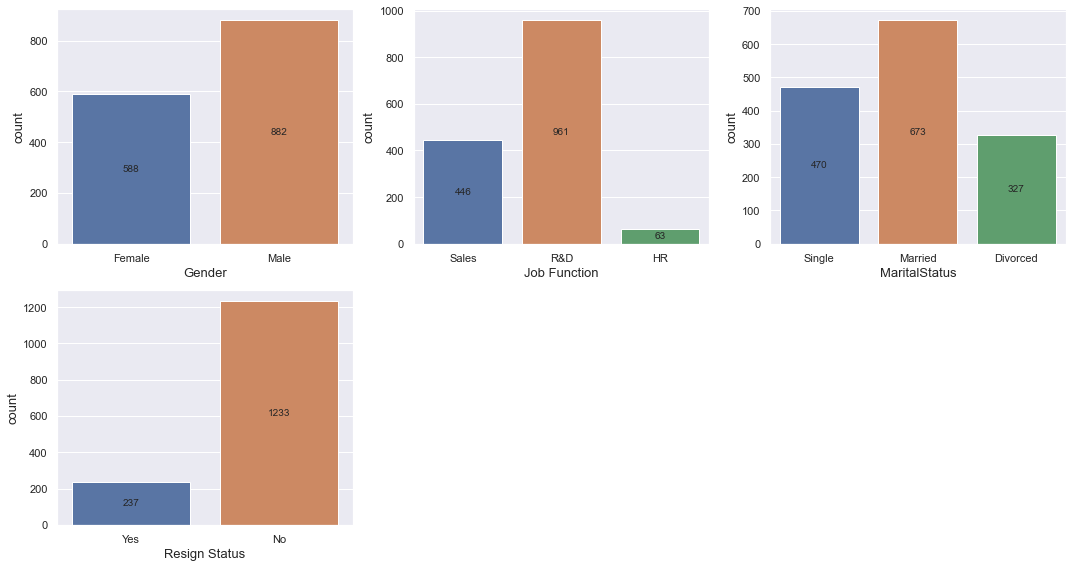

In [12]:
nominal_cols = [
    "Gender",
    "Job Function",
    "MaritalStatus",
    "Resign Status",
]

axs = plot_distributions(
    df,
    plot_fn=sns.countplot,
    cols=nominal_cols,
)
plt.show()


There is about 30% more male employees than female ones \
An overwhelming number of employees belong to R&D while very few employees belong to HR \
Most employees are married, followed by single and then divorced


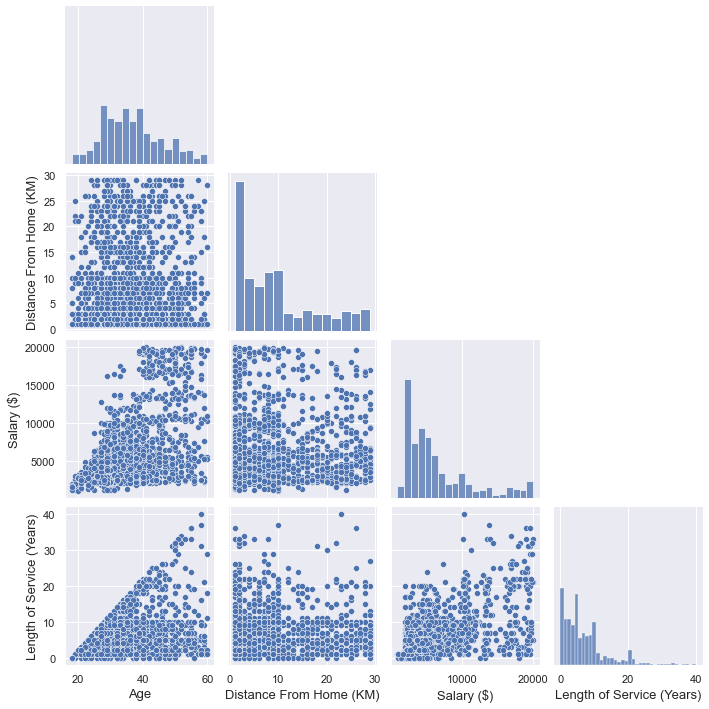

In [13]:
numeric_cols = [
    "Age",
    "Distance From Home (KM)",
    "Salary ($)",
    "Length of Service (Years)",
]

# axs = plot_distribution(
#     df, numeric_cols, sns.histplot, plot_function_kwargs={"kde": True}
# )
# plt.show()

sns.pairplot(df[numeric_cols], corner=True)
plt.show()


From the pairplot, \
Age seems to be normally distributed, but the other numeric variables all have a significant positive skew \
Most employees earn less than $100,000, live less than 10km from the company and have been with the company for less than 10 years \
Age vs. Distance From Home shows absolutely no correlation \
Salary vs. Distance From Home and Length of Service vs. Distance From Home have no clear correlation, but the top right corner of the scatterplots appear relatively sparse, meaning there are little employees who live far from the company, have been with the company for a long time and earn a high salary all at once, though it might be due to employees not living very far away in general \
Age vs. Length of Service has a clear and easily explained positive correlation, with older employees likely having been with the company longer \
Age vs. Salary and Length of Service vs. Salary both have a vague positive correlation which makes intuitive sense


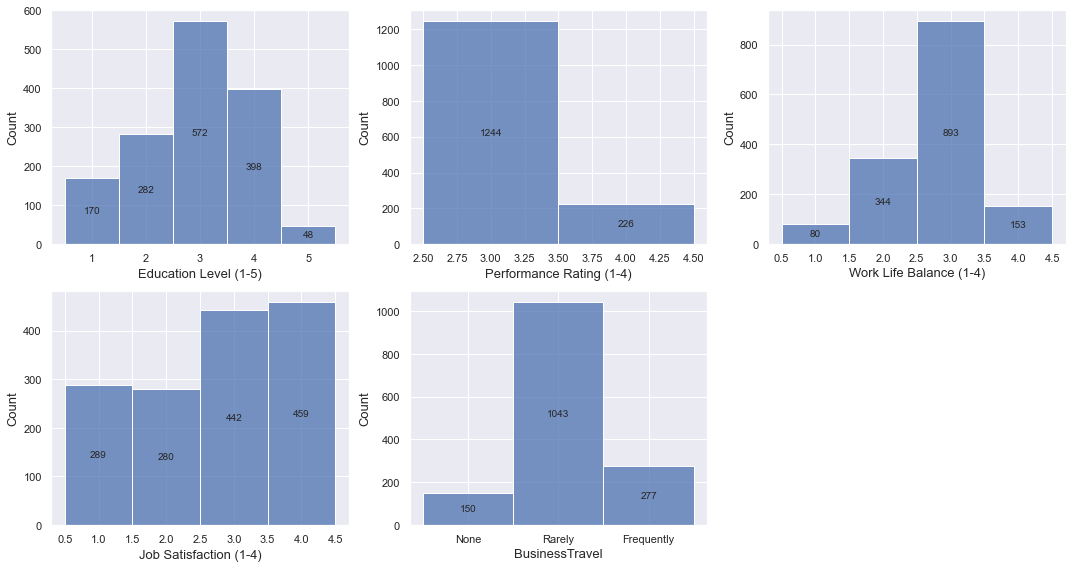

In [14]:
ordinal_cols = [
    "Education Level (1-5)",
    "Performance Rating (1-4)",
    "Work Life Balance (1-4)",
    "Job Satisfaction (1-4)",
    "BusinessTravel",
]

histplot_kwargs = {"discrete": True}

axs = plot_distributions(
    df,
    plot_fn=sns.histplot,
    cols=ordinal_cols,
    plot_fn_kwargs=histplot_kwargs,
)
plt.show()


From the barplots,

Performance Rating only has values for 3 and 4 even though it is on a scale of 1-4 \
Job Satisfaction has an unexpected distribution, with the number of 1’s and 2’s being roughly equal and the number of 3’s and 4’s being roughly equal  \
Education Level and WLB are slightly positively skewed.  \
The other variables all have unsurprising distributions

# Feature Engineering


## Functions and Libraries


In [15]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


In [16]:
# applys scaling to a specified data slice and returns scaled data

from sklearn.preprocessing import RobustScaler, StandardScaler


def scale_df(df, scaler_fn, scaler_fn_kwargs=None, cols=None):
    if cols is None:
        cols = df.columns

    if scaler_fn_kwargs is None:
        scaler_fn_kwargs = {}

    df = df.copy()
    df[cols] = scaler_fn().fit_transform(df[cols])

    return df


In [17]:
# plots histograms of the scaled data on top of each other for visualing ranges


def plot_scaled_ranges(df, title=None, figsize=None):
    if figsize is None:
        figsize = (17, 3)

    cols = df.columns
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    for col in cols:
        sns.histplot(x=df[col], ax=ax, multiple="stack", alpha=0.3)

    if title is not None:
        ax.set_title(title)
        ax.set_xlabel("")

    return ax


In [18]:
# Computes the PCs and percentage variance explained
# returns a table summarising the PCA results AND a fitted PCA model
from sklearn.decomposition import PCA


def pca_results(data, PCA_kwargs=None):
    if PCA_kwargs is None:
        PCA_kwargs = {}

    pca = PCA(**PCA_kwargs).fit(data)

    # Dimension indexing
    dimensions = ["PC{}".format(i + 1) for i in range(len(pca.components_))]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns=data.keys())
    components.index = dimensions

    # PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns=["Eigenvalue"])
    eigenvalues.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns=["Explained Variance"])
    variance_ratios.index = dimensions

    # PCA cumulative explained variance
    ratios = np.array(
        [
            sum(pca.explained_variance_ratio_[: i + 1])
            for i in range(len(pca.components_))
        ]
    ).reshape(len(pca.components_), 1)
    cumulative_variance_ratios = pd.DataFrame(
        np.round(ratios, 4), columns=["Cumulative Explained Variance"]
    )
    cumulative_variance_ratios.index = dimensions

    # Return fitted pca model and concatenated DataFrame
    return pca, pd.concat(
        [eigenvalues, variance_ratios, cumulative_variance_ratios, components], axis=1
    )


In [19]:
# plots loading plot as vertical barplot
# Pass variable components of PCA dataframe to this function
# returns univariate loading plots for each PCA component
def univariate_loadingplot(pca_variables, **kwargs):
    melt = (
        pca_variables.rename_axis("Component").reset_index().melt(id_vars="Component")
    )

    pcs = melt["Component"].unique()

    fig, axs = create_subplots_axs(n_plots=len(pcs), n_cols=4, **kwargs)

    for i, pc in enumerate(pcs):
        mask = melt["Component"] == pc
        sns.barplot(x="value", y="variable", data=melt[mask], ax=axs[i])

        axs[i].set_title(pc)

    fig.suptitle("Loading Plot", fontsize=14)

    plt.tight_layout()
    return fig, axs


## Feature Selection


In [20]:
print(df.columns.values)


['Age' 'Gender' 'BusinessTravel' 'Job Function' 'Distance From Home (KM)'
 'Education Level (1-5)' 'Job Satisfaction (1-4)' 'MaritalStatus'
 'Salary ($)' 'Performance Rating (1-4)' 'Work Life Balance (1-4)'
 'Length of Service (Years)' 'Resign Status']


With 12 variables in our dataset, the curse of dimensionality is a reasonable concern.
Since all of the models will be distance-based, the number of features should be reduced to prevent every data point from appearing equidistant \
However, dropping too many variables will reduce the intepretability of our clusters, which defeats the point of the model.
Hence, I choose to err on the side of caution when evaluating the relevance of each feature

From an intuitive standpoint, Age, Length of Service and Salary are definitely going to be useful features
in determining whether an employeee resigns or not as they are common major reasons behind people choosing to leave a company.

Marital Status and Gender are also likely to be useful as these are major factors that determine if
a person chooses to stop working to spend time with their family or look for higher paying jobs or \
maybe even encourage them to stay with their jobs for a stable source of income

Job Satisfaction and Work Life Balance also seems likely to be useful to determine whether an employeee resigns or not for intuitive reasons.
However, during the EDA, Job Satisfaction was distributed such that the lower end of the scale had similar values to each other and
the upper end of the scale also had values similar to each other

Distance from home might useful since long commutes might turn people away from jobs, but there are also some people
who simply aren't bothered by how far they have to travel, be it near or far

Education Level, Job Function and BusinessTravel don't seem to be immediately and obviously useful in determining whether an employee resigns or not

Performance Rating could possibly be a useful feature in theory, but it's values are all on the upper end of a scale from 1-4, hence it might not
meaningfully distinguish the employees in the data set no matter how well we cluster it.

In conclusion,

- Age, Length of Serv., Salary, Marital Status, Gender, Job Satis., Work Life Bal. are all logically useful features
- However, Job Satis. doesn't have a very distinctive distribution
- Performance Rating is not a useful feature
- Distance from home, Education Level, Job Function and BusinessTravel are not obviously useful features, but erring on the side of caution they are
  not dropped as of yet


In [21]:
df.drop(columns="Performance Rating (1-4)", inplace=True)

ordinal_cols.remove("Performance Rating (1-4)")


## Encoding and Scaling


In [22]:
## Ordinal Encode
df_ordencoded = df.copy()
df_ordencoded["BusinessTravel"] = OrdinalEncoder(
    categories=[  # Based on oridnal_cols
        ["None", "Rarely", "Frequently"]  # BusinessTravel,
    ]
).fit_transform(df["BusinessTravel"].values.reshape(-1, 1))

##Onehot encoded
OH_enc = OneHotEncoder(sparse=False, drop="first").fit(df[nominal_cols])
encoded_data = pd.DataFrame(
    OH_enc.transform(df[nominal_cols]), columns=OH_enc.get_feature_names_out()
)

## concat results together
df_encoded = df_ordencoded.copy()
df_encoded.drop(labels=nominal_cols, axis=1, inplace=True)
df_encoded = pd.concat([df_encoded, encoded_data], axis=1)


During the EDA, most of the numerical data was found to be positively skewed with extreme outliers. Thus, scaling with StandardScaler might result in improperly represented ranges for the skewed data.

Below, the effects of each scaler are plotted for visualisation


In [23]:
df_stdscaled = scale_df(df_encoded, scaler_fn=StandardScaler)
df_rbstscaled = scale_df(df_encoded, scaler_fn=RobustScaler)


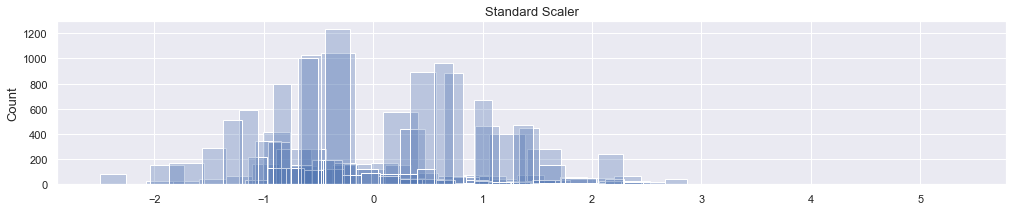

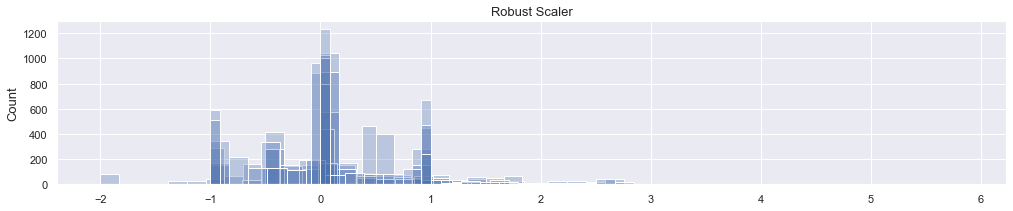

In [24]:
plot_scaled_ranges(df_stdscaled, title="Standard Scaler")
plt.show()

plot_scaled_ranges(df_rbstscaled, title="Robust Scaler")
plt.show()


With StandardScale, the outliers present in columns like salary or length of service caused most of the inliers to be squeezed into the -1 to -0.2 range since the mean and std. would be skewed \
Meanwhile, in columns without outliers, the data was centered around the -1 to 1 range.

With RobustScaler, the data was scaled using the median an IQR, which are not heavily affected by outlier values, resulting in data being centred quite fairly on 0

Since Robust Scaler resulted in the most overlap in the ranges of the data, it is used to scale the data for modelling.


In [25]:
df_rbstscaled.head()


,Age,BusinessTravel,Distance From Home (KM),Education Level (1-5),Job Satisfaction (1-4),Salary ($),Work Life Balance (1-4),Length of Service (Years),Gender_Male,Job Function_R&D,Job Function_Sales,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
0,0.384615,0.0,-0.500000,-0.5,0.5,0.196416,-2.0,0.166667,-1.0,-1.0,1.0,0.0,1.0,1.0
1,1.000000,1.0,0.083333,-1.0,-0.5,0.038588,0.0,0.833333,0.0,0.0,0.0,1.0,0.0,0.0
2,0.076923,0.0,-0.416667,-0.5,0.0,-0.517374,0.0,-0.833333,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.230769,1.0,-0.333333,0.5,0.0,-0.367593,0.0,0.500000,-1.0,0.0,0.0,1.0,0.0,0.0
4,-0.692308,0.0,-0.416667,-1.0,-0.5,-0.265362,0.0,-0.500000,0.0,0.0,0.0,1.0,0.0,0.0


## Dimensionality Reduction


A quick and easy method of evaluating the results of the clusters would be to visualise it on a plot.
However, since the dataset has 14 columns, it is impossible to plot the data without reducing the dimensions. Hence, I would like to find a 2-dimensional subset of the data which retains most of its characteristics such that we can visualise the clusters.


### Principal Component Analysis


In [26]:
rbst_pca, pca_df = pca_results(df_rbstscaled)

pca_df
# 0.3694 at PC2, 0.4625 at PC3
# hits 0.9361 at PC 11


,Eigenvalue,Explained Variance,Cumulative Explained Variance,Age,BusinessTravel,Distance From Home (KM),Education Level (1-5),Job Satisfaction (1-4),Salary ($),Work Life Balance (1-4),Length of Service (Years),Gender_Male,Job Function_R&D,Job Function_Sales,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
PC1,1.5132,0.2822,0.2822,0.3409,-0.0038,-0.0010,0.0614,-0.0031,0.5761,0.0151,0.7342,-0.0184,-0.0222,0.0197,0.0390,-0.0509,-0.0599
PC2,0.5159,0.0962,0.3784,0.4213,-0.0281,0.0963,0.0948,0.0143,0.2110,-0.7366,-0.3586,0.0015,0.1845,-0.1723,0.1034,-0.1131,-0.0200
PC3,0.5110,0.0953,0.4737,-0.4001,0.0272,0.2415,-0.1146,0.0201,-0.3880,-0.5532,0.5299,0.0152,0.1042,-0.0900,-0.0584,0.0563,0.0642
PC4,0.4579,0.0854,0.5591,0.0601,-0.0204,0.9358,0.0593,-0.0267,0.0408,0.1652,-0.0856,-0.0097,-0.1714,0.1643,0.1127,-0.0912,0.0465
PC5,0.4140,0.0772,0.6363,-0.0932,0.0111,-0.1455,-0.0092,0.0381,0.1407,-0.3421,-0.0719,-0.0350,-0.6325,0.6176,-0.1216,0.1406,0.0958
PC6,0.3737,0.0697,0.7060,0.0766,0.0437,0.1637,0.0916,0.0303,0.1533,0.0229,-0.0684,-0.0310,0.1473,-0.1264,-0.7006,0.6242,0.0907
PC7,0.3078,0.0574,0.7634,0.0497,0.1044,-0.0347,0.0963,-0.9656,-0.0614,-0.0282,0.0217,-0.1462,-0.0168,0.0085,-0.0123,0.0128,0.1290
PC8,0.2979,0.0556,0.8190,0.5030,0.1334,-0.0595,0.5530,0.1527,-0.5783,0.0407,0.1693,-0.0852,-0.1116,0.1019,-0.0207,0.0354,-0.0057
PC9,0.2883,0.0538,0.8727,0.0397,-0.9502,-0.0150,0.1197,-0.1210,-0.0987,-0.0061,0.0440,0.1826,-0.0309,0.0260,-0.0816,0.0292,-0.1099
PC10,0.2364,0.0441,0.9168,-0.0079,-0.2028,0.0074,-0.1249,0.0967,-0.0146,0.0001,-0.0065,-0.9598,0.0286,-0.0091,0.0270,0.0185,-0.1023


The first 3 PCs are not sufficient to capture even 50% of the variance in the dataset. If we wanted to achieve at least 80% of the variance, we would need to go up to PC 8, over half the number of original variable, which will not allow us to visualise the data meaningfully.


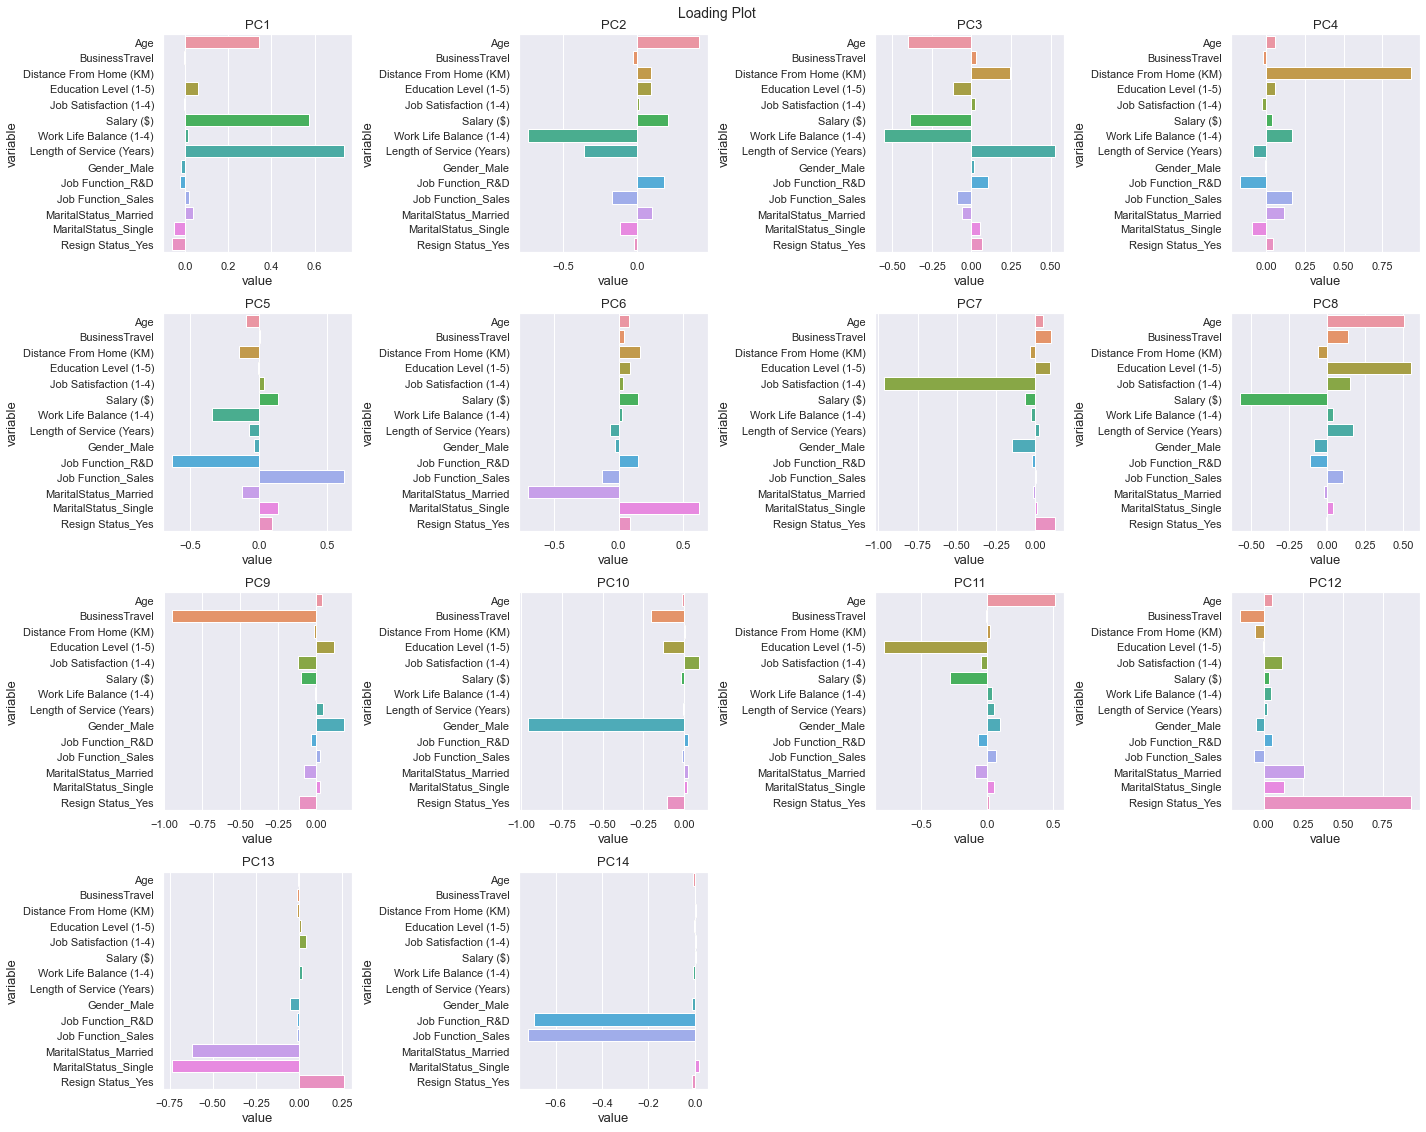

In [27]:
univariate_loadingplot(pca_df.iloc[:, 3:])
plt.show()


Furthermore, the PC’s don’t seem to have easily interpretable linear combinations of the original features. If we were to attempt to use the first 8 PCs, we would not be able to directly generate relevant insights related to the original variables. \
Hence, PCA will not be useful in reducing the dimensions of our dataset to help in visualising and we will have to rely on simple feature selection


# Modelling


## Functions and Libraries


In [28]:
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN

import gower


In [29]:
## plots silhoueete score for all data points pased in

from sklearn.metrics import silhouette_score, silhouette_samples


def plot_silhouette(data, labels):
    silh_score = silhouette_score(data, labels)
    silh_coeffs = silhouette_samples(data, labels)

    y_lower = 0
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    for label in unique_labels:
        cluster_silh = silh_coeffs[labels == label]
        cluster_silh.sort()

        y_upper = y_lower + len(cluster_silh)
        color = cm.ocean(float(label) / n_clusters)
        ax.barh(
            range(y_lower, y_upper),
            cluster_silh,
            facecolor=color,
            edgecolor=color,
        )
        ax.text(-0.03, (y_lower + y_upper) / 2, str(label))

        y_lower = y_upper + 20

    ax.axvline(x=silh_score, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xlim([-0.2, 0.7])
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster labels")
    ax.set_title(f"n = {n_clusters}")

    return


In [30]:
## plots an elbow plot for different values of k when given a metric

from sklearn.metrics import calinski_harabasz_score, silhouette_score


def visualise_k_elbow(
    data,
    model,
    metric,
    metric_kwargs=None,
    k_start=2,
    k_end=12,
    fit_kwargs=None,
    **kwargs,
):
    if metric_kwargs is None:
        metric_kwargs = {}
    if fit_kwargs is None:
        fit_kwargs = {}

    scores = []
    with warnings.catch_warnings():
        # ignore all caught warnings
        warnings.filterwarnings("ignore")
        # execute code that will generate warnings
        for i in range(k_start, k_end + 1):
            model.set_params(n_clusters=i)
            results = model.fit(data, **fit_kwargs)
            labels = results.labels_

            scores.append(metric(data, labels, **metric_kwargs))

    fig = go.FigureWidget(
        data=go.Scatter(
            y=scores,
            x=np.arange(k_start, k_end + 1),
        ),
        **kwargs,
    )

    fig.update_layout(
        title=f"{metric.__name__} elbow plot for {model.__class__.__name__}",
        xaxis_title="k",
        yaxis_title=f"{metric.__name__}",
        width=700,
        height=400,
    )

    return fig


In [31]:
## plots a linkage dendrogram

from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(data, model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    results = model.fit(data)

    # create the counts of samples under each node
    counts = np.zeros(results.children_.shape[0])
    n_samples = len(results.labels_)
    for i, merge in enumerate(results.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [results.children_, results.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [32]:
from scipy.stats import chi2_contingency


def chi_square_test(index, columns, data=None, print_results=True):
    if data is not None:
        index = data[index]
        columns = data[columns]

    contingency_tab = pd.crosstab(index, columns)

    chisq, p, dof, expected = chi2_contingency(contingency_tab)

    if print_results:
        if not isinstance(index, str):
            index = index.name

        print("====================================================")
        print(f"{index} Chi-square test:")
        print("====================================================")
        print(f"Observed freq:")
        display(contingency_tab)
        print(f"Expected freq:")
        display(
            pd.DataFrame(
                expected, columns=contingency_tab.columns, index=contingency_tab.index
            )
        )
        print(f"p-value: {p}")

    else:
        return contingency_tab, (chisq, p, expected)


In [33]:
## calculates a dataframe of central measures for each cluster


def cluster_summary(
    df,
    labels,
    numeric_cols=numeric_cols,
    ordinal_cols=ordinal_cols,
    nominal_cols=nominal_cols,
):

    df = df.copy()
    df["Cluster labels"] = labels
    group = df.groupby("Cluster labels")

    num_df = group[numeric_cols].agg([np.mean, np.median])
    ord_df = group[nominal_cols].agg([pd.Series.mode])
    nom_df = group[ordinal_cols].median(np.median)
    size_df = group.size()
    size_df.name = "Cluster size"

    return pd.concat([size_df, nom_df, num_df, ord_df], axis=1)


In [33]:
## returns a dataframe summarising dbscan params
## epsilon, min_samples, number of clusters,
##  number of points classified as noise and the size of the largest non-noise cluster


def dbscan_summary(eps_range, min_range, data):
    row_list = []

    for eps in eps_range:
        for min in min_range:
            dbs = DBSCAN(eps=eps, min_samples=min, metric="precomputed").fit(data)
            noise = dbs.labels_[dbs.labels_ == -1]
            labels = pd.Series(dbs.labels_)

            label_count = labels.value_counts()
            non_noise = label_count[label_count.index != -1].max()

            dbs_dict = {
                "min": min,
                "eps": eps,
                "n": len(label_count),
                "noise": len(noise),
                "largest": non_noise,
            }
            row_list.append(dbs_dict)

    return pd.DataFrame(row_list)


## Measurement Metrics


### Silhouette Coeffificent


The Silhouette Coefficient is a metric that quantifies how well a clustering algorithm segregates the dataset. \
A silhouette value is calculated for a data point $p$ in the dataset with the formula:
$${s(p) = \frac{b-a}{max(a, b)}}$$

where $a$ is the mean distance between $p$ and all other data points in the same cluster
\
and $b$ is the distance between $p$ and the nearest data point in a different cluster, known as $p$'s 'neighbouring cluster'.

The value can take on values in the range -1 to 1, \
where a negative value means that $p$ is closer to data points belonging its neighbouring cluster than its assigned cluster ( i.e. $b < a$ ) \
while a positive value means that $p$ is closer to data points within its assigned cluster than its neighbouring cluster ( i.e. $a < b$ )

In essence, the silhouette value for $p$ tells us how well-assigned $p$ is to its cluster compared to a nearby cluster \
The average silhouette value for all data points in the dataset is known as the Silhouette Coefficient and it gives us a method of evaluating the performance of a clustering algorithm.

However, the Silhouette Coefficient is generally higher for spherical or elliptical clusters than other concepts of clusters.

We will use this metric to determine the optimal cluster numbers by attempting to maximise the Silhouette Coefficient


### Calinski-Harabasz index


The Calinski-Harabasz index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters.
It is calculated for a dataset of size $n_E$ with $k$ clusters with the formula:
$$s = \frac{tr(B_k)}{k - 1} \div \frac{tr(W_k)}{n_E - k} $$
where $\frac{tr(B_k)}{k - 1}$ represents the total spread between clusters divided by the number of clusters - 1 \
and $\frac{tr(W_k)}{n_E - k}$ represents the total spread within the clusters divided by
(the number of points - the number of clusters)

Higher scores correspond to having dense clusters with small spreads that are also well-separated from each other. \
The values can take on any positive value, hence there is no standard definition of a 'good' score.

However, the Calinski-Harbasz Index once again is generally higher for spherical or elliptical clusters than other concepts of clusters.

We will use this metric to serve as a cross-reference for the Silhouette Coefficient and to reinforce the choice of cluster numbers


### Distance Metrics


For distance metrics, I decided to use the Gower distance for the dataset.

In contrast to the straight line distance between two points, the Gower distance measures how different two data points are and is capable of handling both numeric and non-numeric data. \
Two data points are compared to one another by their features and the difference in values for each feature is calculated using different methods according to the feature's data type. \
The differences are then put together using a weighted sum and averaged out to produce the Gower distance between the two points. \
The Gower distance can take on values from 0 to 1, with 0 representing complete similarity and 1 representing no similarity


## K-Means


### Model Description


K-means is an example of a centroid-based clustering algorithm.
Centroid-based clustering algorithms try to group data points into a predetermined number of clusters defined by a central point based on a distance metric.

K-means algorithm follows these steps:

1. n data points are initialised as central points of their own clusters
2. Every data point is assigned to one of the n clusters based on which central point they are the closest to
3. A new central point for each cluster is calculated based the mean of all of the assigned points within the cluster
4. Steps 2 and 3 are repeated for a maximum number of iterations or until every point is assigned to the same cluster they were in in the previous iteration

Based on the steps described, there are 2 major parameters of the K-means algorithm.

1. The number of clusters, n. the algorithm has to be told how many clusters the dataset has to be separated into, which means a desired number of clusters has to be decided on beforehand
2. The selection of initial central points. Different initialisations will result in the algorithm converging to different final clusters


### Model Evaluation


In [34]:
kmn = KMeans(random_state=39)

HBox(
    [
        visualise_k_elbow(df_rbstscaled, kmn, silhouette_score),
        visualise_k_elbow(df_rbstscaled, kmn, calinski_harabasz_score),
    ]
)


    'data': [{'type': 'scatter',
              'uid': '4fd4d680-9def-4a1c-bb36-5…

In [34]:
n_range = np.arange(1, 15)
inertia = [
    KMeans(random_state=39, n_clusters=i).fit(df_rbstscaled).inertia_ for i in n_range
]

fig = go.Figure(data=[go.Scatter(x=n_range, y=inertia)], layout={"width": 600})
fig.update_layout(title="Inertia Plot", xaxis_title="n", yaxis_title="Inertia")

fig.show()

# elbow at 7-8

### Intepreting Clusters


#### n=6


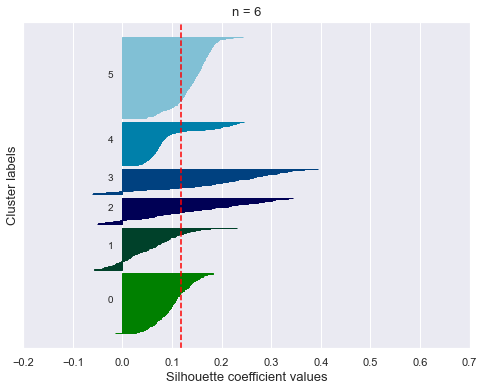

In [35]:
kmeans_params = {
    "random_state": 39,
    "n_clusters": 6,
}
kmeans6 = KMeans(**kmeans_params).fit(df_rbstscaled)
plot_silhouette(data=df_rbstscaled, labels=kmeans6.labels_)

# silhouette avg of around 0.12, negative scores in clusters 3,2,1,0 as well


In [36]:
cluster_summary(df_ordencoded, labels=kmeans6.labels_)


,Cluster size,Education Level (1-5),Work Life Balance (1-4),Job Satisfaction (1-4),BusinessTravel,"(Age, mean)","(Age, median)","(Distance From Home (KM), mean)","(Distance From Home (KM), median)","(Salary ($), mean)","(Salary ($), median)","(Length of Service (Years), mean)","(Length of Service (Years), median)","(Gender, mode)","(Job Function, mode)","(MaritalStatus, mode)","(Resign Status, mode)"
Cluster labels,,,,,,,,,,,,,,,,,
0,318,3.0,3.0,3.0,1.0,34.600629,34.0,6.915094,7.0,5637.864780,5357.0,5.839623,5.0,Male,Sales,Married,No
1,223,3.0,3.0,3.0,1.0,35.591928,35.0,23.080717,23.0,5143.946188,4539.0,6.174888,6.0,Male,R&D,Married,No
2,138,3.0,3.0,3.0,1.0,48.710145,50.0,7.695652,5.0,14812.217391,15008.0,5.978261,5.0,Male,R&D,Married,No
3,133,3.0,3.0,3.0,1.0,44.827068,43.0,8.639098,6.0,14154.744361,14336.0,21.977444,20.0,Male,R&D,Married,No
4,228,3.0,2.0,3.0,1.0,34.535088,33.0,7.552632,6.0,3941.890351,3292.5,4.964912,5.0,Male,R&D,Married,No
5,430,3.0,3.0,3.0,1.0,34.372093,34.0,5.195349,4.0,4171.976744,3625.5,5.088372,5.0,Male,R&D,Married,No


The clusters show significant variation in the numeric features.

- employees in cluster 2 and 3 are both older on average than the other clusters
- employees in cluster 1 live significantly further away from the company than any other cluster
- employees in cluster 2 and 3 also have higher salaries than the other clusters, almost thrice their averages
- Employees in cluster 3 have been with the company for far longer than the otehr clusters
- employees in cluster 0 are more likely to belong to the sales department while the other clusters are more likely to be from the R&D department

However, there are no other distinctions in the variables, including Resign Status. Hence, nothing valuable can be drawn from these clusters


## K-Prototypes


### Model Description


The K-Prototypes algorithm is based on the original K-means algorithm and thus follows an extremely similar set of steps. \
The main difference is in how the two algorithms define distance to the central points. K-means by definition uses the Euclidean distance formula $d = \sqrt{x_1^2 + x_2^2 + ... + x_k^2}$. This restricts its usage to strictly numeric data, and other types have to be converted into numeric representations.

On the other hand, the K-Prototypes algorithm uses a specially defined distance metric that calculates the Euclidean distance betwwen numeric data and a similarity measure of 1 for matches and 0 for mismatches between categorical data before adding them up into a weighted average sum between 0 and 1. \
The benefit of this is that the structure of the original data can be preserved entirely for the model to use, possibly leading to more relevant and realistic interpretations


### Model Evaluation


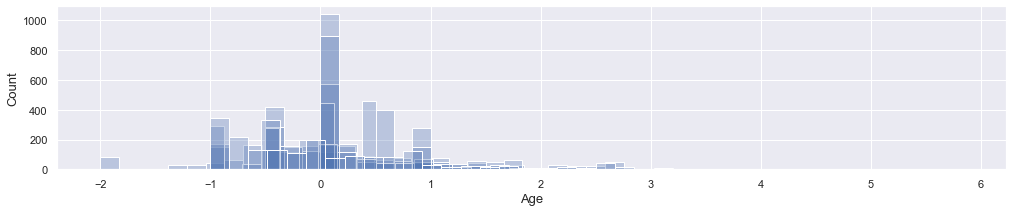

In [37]:
# keep cateogircal and scale numerical for kprototypes

kproto_nums = df_ordencoded.select_dtypes("number").columns
kproto_scaled = df_ordencoded.copy()
kproto_scaled[kproto_nums] = scale_df(
    kproto_scaled[kproto_nums], scaler_fn=RobustScaler
)

plot_scaled_ranges(kproto_scaled.select_dtypes("number"))
plt.show()


In [38]:
n_range = np.arange(1, 20)
inertia = [
    KPrototypes(random_state=39, n_clusters=i)
    .fit(kproto_scaled, categorical=[df.columns.get_loc(nom) for nom in nominal_cols])
    .cost_
    for i in n_range
]

fig = go.Figure(data=[go.Scatter(x=n_range, y=inertia)], layout={"width": 600})
fig.update_layout(title="Inertia Plot", xaxis_title="n", yaxis_title="Inertia")

fig.show()


# elbow at 6-7

### Intepreting Clusters


#### n=7


In [39]:
kproto_params = {"random_state": 39, "n_clusters": 7}

kproto7 = KPrototypes(**kproto_params).fit(
    kproto_scaled, categorical=[df.columns.get_loc(nom) for nom in nominal_cols]
)
cluster_summary(df_ordencoded, labels=kproto7.labels_)


,Cluster size,Education Level (1-5),Work Life Balance (1-4),Job Satisfaction (1-4),BusinessTravel,"(Age, mean)","(Age, median)","(Distance From Home (KM), mean)","(Distance From Home (KM), median)","(Salary ($), mean)","(Salary ($), median)","(Length of Service (Years), mean)","(Length of Service (Years), median)","(Gender, mode)","(Job Function, mode)","(MaritalStatus, mode)","(Resign Status, mode)"
Cluster labels,,,,,,,,,,,,,,,,,
0,130,3.0,3.0,3.0,1.0,49.223077,50.0,8.907692,6.5,15227.923077,15982.0,5.661538,5.0,Male,R&D,Married,No
1,244,3.0,2.0,3.0,1.0,32.930328,32.0,7.450820,7.0,4096.692623,3443.0,4.491803,4.0,Male,R&D,Married,No
2,235,3.0,3.0,3.0,1.0,42.387234,41.0,5.829787,5.0,4785.523404,4728.0,4.255319,4.0,Female,R&D,Married,No
3,233,3.0,3.0,3.0,1.0,37.085837,36.0,6.317597,5.0,6927.128755,6306.0,11.819742,11.0,Male,R&D,Married,No
4,104,3.0,3.0,3.0,1.0,46.028846,45.0,8.778846,6.0,15752.615385,16795.5,23.201923,21.5,Male,R&D,Married,No
5,231,3.0,3.0,3.0,1.0,34.865801,34.0,22.489177,23.0,4895.761905,4444.0,5.606061,5.0,Male,R&D,Married,No
6,293,3.0,3.0,3.0,1.0,28.672355,29.0,5.416382,4.0,3659.638225,2979.0,3.440273,3.0,Male,R&D,Single,No


The clusters show significant variation in the numeric features.

- employees in cluster 0, 2 and 4 are older on average than the other clusters with medians at 40+ compared to the others at aroud 30
- employees in cluster 5 live significantly further away from the company than any other cluster
- employees in cluster 0 and 4 also have higher salaries than the other clusters, almost thrice their averages
- Employees in cluster 3 and 4 have been with the company for far longer than the otehr clusters
- employees in cluster 2 are more likely to be female
- employees in cluster 6 are more likely to be Single

However, there are no other distinctions in the variables, including Resign Status. Hence, nothing valuable can be drawn from these clusters


## Improving K-centroids


Disappointingly, the previous K-centroids models all performed terribly, failing to provide very meaningful clustering of employees, both in regards to the likelihood of resignation and general characteristics. \
This suggests that the curse of dimensionality is extremely apparent for the model. Hence, more features will have to be dropped to combat it.

During the preprocessing steps, a few columns were identified that might not be useful

- However, Job Satis. doesn't have a very distinctive distribution
- Distance from home, Education Level, Job Function and BusinessTravel are not obviously useful features, but erring on the side of caution they are
  not dropped as of yet

The initial clusterings managed to capture a slight distinction in Distance from home, Work Life Balance and Job Function. \
However, Education Level, Business Travel and Job Satis. all showed no distinction between clusters at all \
Hence, we will try dropping some of them to see if it improves our clusters.


### BusinessTravel


In [40]:
df_drop_business = df_rbstscaled.copy()
df_drop_business.drop("BusinessTravel", axis=1, inplace=True)

kproto_drop_business = kproto_scaled.copy()
kproto_drop_business.drop("BusinessTravel", axis=1, inplace=True)


#### K-Means


In [41]:
n_range = np.arange(1, 20)
inertia = [
    KMeans(random_state=39, n_clusters=i).fit(df_drop_business).inertia_
    for i in n_range
]

fig = go.Figure(data=[go.Scatter(x=n_range, y=inertia)], layout={"width": 600})
fig.update_layout(title="Inertia Plot", xaxis_title="n", yaxis_title="Inertia")

fig.show()

## same elbow

,Cluster size,Education Level (1-5),Work Life Balance (1-4),Job Satisfaction (1-4),"(Age, mean)","(Age, median)","(Distance From Home (KM), mean)","(Distance From Home (KM), median)","(Salary ($), mean)","(Salary ($), median)","(Length of Service (Years), mean)","(Length of Service (Years), median)","(Gender, mode)","(Job Function, mode)","(MaritalStatus, mode)","(Resign Status, mode)"
Cluster labels,,,,,,,,,,,,,,,,
0,208,3.0,3.0,3.0,35.211538,34.0,23.091346,24.0,4952.990385,4439.0,5.894231,5.0,Male,R&D,Married,No
1,181,3.0,3.0,3.0,37.872928,36.0,6.502762,5.0,6940.331492,6162.0,12.585635,12.0,Male,R&D,Married,No
2,296,3.0,3.0,3.0,34.327703,33.5,7.097973,7.0,5490.594595,5302.5,5.182432,5.0,Male,Sales,Married,No
3,103,3.0,3.0,3.0,46.135922,45.0,8.970874,6.0,15852.116505,16823.0,23.203883,22.0,Male,R&D,Married,No
4,132,3.0,3.0,3.0,49.515152,50.0,8.393939,6.0,14938.583333,15594.5,5.409091,5.0,Male,R&D,Married,No
5,212,3.0,2.0,3.0,34.179245,32.0,7.698113,6.5,3715.943396,3161.5,4.452830,4.0,Male,R&D,Married,No
6,338,3.0,3.0,3.0,33.739645,33.0,5.230769,4.0,3713.698225,3083.5,3.597633,3.0,Male,R&D,Married,No


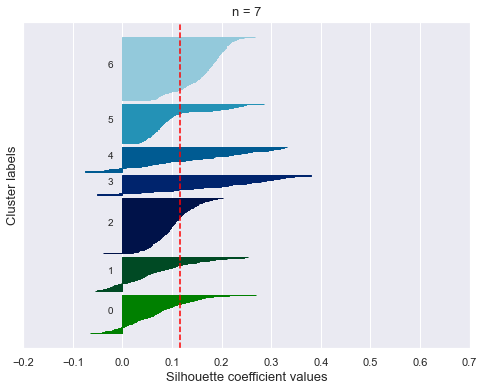

In [42]:
kmeans_params = {
    "random_state": 39,
    "n_clusters": 7,
}
better_kmeans6 = KMeans(**kmeans_params).fit(df_drop_business)
plot_silhouette(data=df_drop_business, labels=better_kmeans6.labels_)
cluster_summary(
    df_ordencoded,
    labels=better_kmeans6.labels_,
    ordinal_cols=[col for col in ordinal_cols if col not in ("BusinessTravel")],
)


There are sadly no new major distinctions to be seen from dropping BusinessTravel


#### K_Prototypes


In [43]:
n_range = np.arange(1, 20)
inertia = [
    KPrototypes(random_state=39, n_clusters=i)
    .fit(
        kproto_drop_business,
        categorical=[kproto_drop_business.columns.get_loc(nom) for nom in nominal_cols],
    )
    .cost_
    for i in n_range
]

fig = go.Figure(data=[go.Scatter(x=n_range, y=inertia)], layout={"width": 600})
fig.update_layout(title="Inertia Plot", xaxis_title="n", yaxis_title="Inertia")

fig.show()

## same elbow

In [44]:
kproto_params = {"random_state": 39, "n_clusters": 7}

better_kproto7 = KPrototypes(**kproto_params).fit(
    kproto_drop_business,
    categorical=[kproto_drop_business.columns.get_loc(nom) for nom in nominal_cols],
)
cluster_summary(
    df_ordencoded,
    labels=better_kproto7.labels_,
    ordinal_cols=[col for col in ordinal_cols if col not in ("BusinessTravel")],
)


,Cluster size,Education Level (1-5),Work Life Balance (1-4),Job Satisfaction (1-4),"(Age, mean)","(Age, median)","(Distance From Home (KM), mean)","(Distance From Home (KM), median)","(Salary ($), mean)","(Salary ($), median)","(Length of Service (Years), mean)","(Length of Service (Years), median)","(Gender, mode)","(Job Function, mode)","(MaritalStatus, mode)","(Resign Status, mode)"
Cluster labels,,,,,,,,,,,,,,,,
0,104,3.0,3.0,3.0,46.028846,45.0,8.778846,6.0,15752.615385,16795.5,23.201923,21.5,Male,R&D,Married,No
1,237,3.0,3.0,3.0,42.329114,41.0,5.831224,5.0,4808.902954,4765.0,4.274262,4.0,Female,R&D,Married,No
2,294,3.0,3.0,3.0,28.659864,29.0,5.384354,4.0,3659.108844,2981.0,3.435374,3.0,Male,R&D,Single,No
3,243,3.0,2.0,3.0,33.045267,32.0,7.423868,7.0,4124.703704,3464.0,4.547325,4.0,Male,R&D,Married,No
4,230,3.0,3.0,3.0,34.717391,34.0,22.534783,23.0,4819.395652,4360.0,5.565217,5.0,Male,R&D,Married,No
5,131,3.0,3.0,3.0,49.206107,50.0,9.061069,7.0,15202.129771,15972.0,5.694656,5.0,Male,R&D,Married,No
6,231,3.0,3.0,3.0,37.108225,36.0,6.324675,5.0,6940.718615,6323.0,11.839827,11.0,Male,R&D,Married,No


There still isn't much new meaningful distinction between the clusters or to Resign Status.


### Job Satis., BusinessTravel, WLB


In [45]:
df_drop_satisTravelWLB = df_rbstscaled.copy()
df_drop_satisTravelWLB.drop(
    ["Job Satisfaction (1-4)", "BusinessTravel", "Work Life Balance (1-4)"],
    axis=1,
    inplace=True,
)

kproto_drop_satisTravelWLB = kproto_scaled.copy()
kproto_drop_satisTravelWLB.drop(
    ["Job Satisfaction (1-4)", "BusinessTravel", "Work Life Balance (1-4)"],
    axis=1,
    inplace=True,
)


#### K-Means


In [46]:
n_range = np.arange(1, 20)
inertia = [
    KMeans(random_state=39, n_clusters=i).fit(df_drop_satisTravelWLB).inertia_
    for i in n_range
]

fig = go.Figure(data=[go.Scatter(x=n_range, y=inertia)], layout={"width": 600})
fig.update_layout(title="Inertia Plot", xaxis_title="n", yaxis_title="Inertia")

fig.show()

# same elbow

,Cluster size,Education Level (1-5),"(Age, mean)","(Age, median)","(Distance From Home (KM), mean)","(Distance From Home (KM), median)","(Salary ($), mean)","(Salary ($), median)","(Length of Service (Years), mean)","(Length of Service (Years), median)","(Gender, mode)","(Job Function, mode)","(MaritalStatus, mode)","(Resign Status, mode)"
Cluster labels,,,,,,,,,,,,,,
0,163,3.0,37.871166,36.0,7.257669,6.0,7222.392638,6377.0,13.245399,13.0,Male,R&D,Married,No
1,286,3.0,36.290210,35.5,5.433566,4.0,3908.821678,3458.0,4.639860,5.0,Male,R&D,Married,No
2,224,3.0,34.910714,34.0,23.133929,23.0,4739.330357,4244.0,5.236607,5.0,Male,R&D,Married,No
3,297,3.0,34.606061,34.0,6.942761,7.0,5543.134680,5343.0,5.232323,5.0,Male,Sales,Married,No
4,129,3.0,49.000000,50.0,8.472868,6.0,15285.093023,16032.0,5.775194,5.0,Male,R&D,Married,No
5,99,3.0,46.343434,45.0,8.939394,6.0,15988.121212,16823.0,23.414141,22.0,Male,R&D,Married,No
6,272,3.0,32.055147,32.0,5.713235,5.0,3682.404412,3014.5,3.772059,3.5,Male,R&D,Single,No


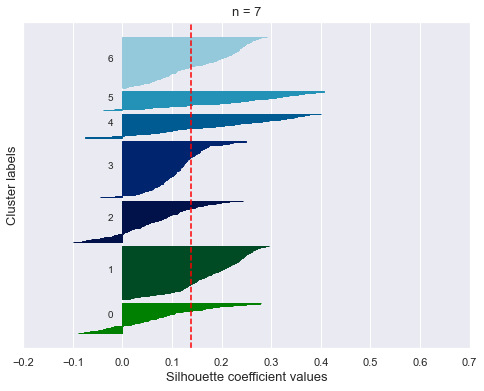

In [47]:
kmeans_params = {
    "random_state": 39,
    "n_clusters": 7,
}
satisTravelWLB_kmeans6 = KMeans(**kmeans_params).fit(df_drop_satisTravelWLB)
plot_silhouette(data=df_drop_satisTravelWLB, labels=satisTravelWLB_kmeans6.labels_)
cluster_summary(
    df,
    labels=satisTravelWLB_kmeans6.labels_,
    ordinal_cols=[
        col
        for col in ordinal_cols
        if col
        not in ("Job Satisfaction (1-4)", "BusinessTravel", "Work Life Balance (1-4)")
    ],
)


There are no new major distinctions to be seen from dropping Job Satis., BusinessTravel and WLB


#### K- Prototypes


In [48]:
n_range = np.arange(1, 20)
inertia = [
    KPrototypes(random_state=39, n_clusters=i)
    .fit(
        kproto_drop_satisTravelWLB,
        categorical=[
            kproto_drop_satisTravelWLB.columns.get_loc(nom) for nom in nominal_cols
        ],
    )
    .cost_
    for i in n_range
]

fig = go.Figure(data=[go.Scatter(x=n_range, y=inertia)], layout={"width": 600})
fig.update_layout(title="Inertia Plot", xaxis_title="n", yaxis_title="Inertia")

fig.show()


# elbow still the same

In [49]:
kproto_params = {"random_state": 39, "n_clusters": 6}

satisTravelWLB_kproto7 = KPrototypes(**kproto_params).fit(
    kproto_drop_satisTravelWLB,
    categorical=[
        kproto_drop_satisTravelWLB.columns.get_loc(nom) for nom in nominal_cols
    ],
)
cluster_summary(
    df,
    labels=satisTravelWLB_kproto7.labels_,
    ordinal_cols=[
        col
        for col in ordinal_cols
        if col
        not in ("Job Satisfaction (1-4)", "BusinessTravel", "Work Life Balance (1-4)")
    ],
)


,Cluster size,Education Level (1-5),"(Age, mean)","(Age, median)","(Distance From Home (KM), mean)","(Distance From Home (KM), median)","(Salary ($), mean)","(Salary ($), median)","(Length of Service (Years), mean)","(Length of Service (Years), median)","(Gender, mode)","(Job Function, mode)","(MaritalStatus, mode)","(Resign Status, mode)"
Cluster labels,,,,,,,,,,,,,,
0,111,3.0,45.738739,44.0,9.063063,6.0,15467.117117,16704.0,22.828829,21.0,Male,R&D,Married,No
1,335,4.0,41.379104,40.0,6.047761,5.0,4635.143284,4393.0,3.746269,4.0,Male,R&D,Married,No
2,350,3.0,27.811429,28.0,5.511429,4.0,3356.185714,2843.5,3.365714,3.0,Male,R&D,Single,No
3,292,3.0,36.489726,35.0,6.047945,5.0,6606.715753,6027.0,10.993151,10.0,Male,R&D,Married,No
4,256,3.0,34.179688,34.0,22.203125,23.0,4890.792969,4439.0,5.535156,5.0,Male,R&D,Married,No
5,126,3.0,49.206349,50.0,8.746032,6.0,15347.753968,16012.0,5.619048,5.0,Male,R&D,Married,No


Slight distinction was made in education level with one cluster with an new median level of 4 \
However, overall the clusters are still unchanged


Overall, the K-centroid algorihtms all performed poorly and were ill-suited to explain the dataset


## HAC


In [50]:
## sklearn params
# 'affinity':'euclidean',
# 'linkage': 'ward',
# 'connectivity': None,
# 'distance_threshold': None,
# 'n_clusters': 2,


### Model description


Agglomerative clustering is an example of a hierarchical clustering algorithm.
Hierarchical clustering algorithms merge or split data points based on how similar they are to each other one iteration at a time, resulting in a hierarchical tree of clusters.
Hierarchical clustering algorithms that merge data points are known as agglomerative while those that split the dataset are known as divisive

The steps for the Agglomerative clustering algorithm are:

1. Each data point starts as their own individual cluster
2. Clusters which are the closest together are then merged into a new, larger cluster
3. Step 2 is repeated one iteration at a time until there is only a single cluster left \
   The process can be stopped at any iteration to produce a desired number of clusters

The main parameter for the Agglomerative clustering algorithm is the method used to determine which clusters are closest together. \
We can calculate the distance using different distance metrics, \
and there are also four different options to use the distance metric:

- 'Simple linkage', which finds the distance of the closest pair of points between each cluster
- 'Complete linkage', which finds the distance of the farthest pair of points between each cluster,
- 'Average linkage', which finds the average distance of all pairs of points between each cluster,
- and 'Ward Linkage' which finds the distance of the central points between each cluster

The different linkage methods correspond to the general shape of the clusters formed,

- simple linkage results in chains being formed since the clusters with the nearest pairs are linked together at each iteration
- complete linkage results in clusters with dense borders but not necessarily dense centers being formed since the clusters with the closest outer points are merged together
- average linkage is a reasonably robust method that has no bias to forming different cluster shapes
- ward linkage is specific to the least SSE metric and results in roughly normal clusters

Since there is a lack of domain knowledge for what possible cluster shapes could look like, average linkage will be used for the models.


### Model evaluation


In [51]:
# precalculated gower distance to use in computation of distances

gower_df = df.copy()
gower_df["BusinessTravel"] = gower_df["BusinessTravel"].astype("object")
gower_distance = gower.gower_matrix(gower_df)


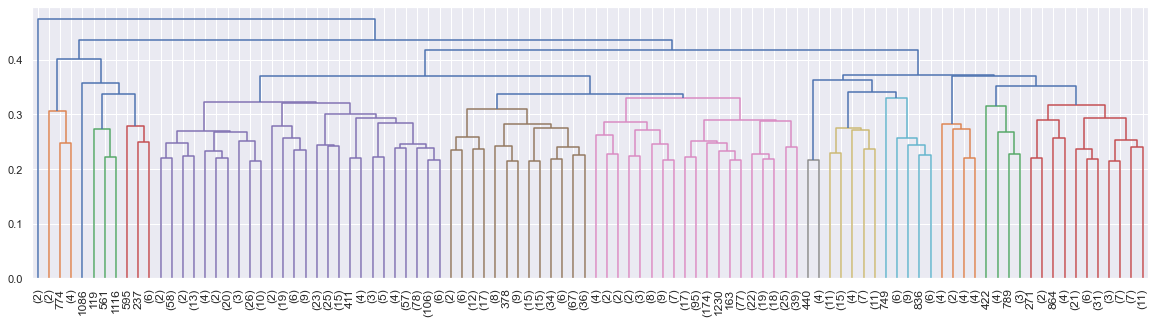

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

plot_dendrogram(
    data=gower_distance,
    model=AgglomerativeClustering(
        distance_threshold=0,
        n_clusters=None,
        affinity="precomputed",
        linkage="average",
    ),
    truncate_mode="lastp",
    p=100,
    distance_sort=True,
    leaf_font_size=12,
    ax=ax,
)

# some smaller clusters based on the linkage threshold, 
# there are three disttinct large clusters in the center, purple, brown and pink

In [53]:
model = AgglomerativeClustering(
    affinity="precomputed",
    linkage="average",
)

HBox(
    [
        visualise_k_elbow(gower_distance, model, silhouette_score),
        visualise_k_elbow(gower_distance, model, calinski_harabasz_score),
    ]
)


    'data': [{'type': 'scatter',
              'uid': 'ccd7caba-ec87-4747-800d-2…

### Intepreting clusters


#### n=4


In [54]:
gow4_agglo_params = {"n_clusters": 4, "affinity": "precomputed", "linkage": "average"}

gow4_agglo = AgglomerativeClustering(**gow4_agglo_params).fit(gower_distance)
cluster_summary(df_ordencoded, gow4_agglo.labels_).sort_values(
    "Cluster size", ascending=False
)


,Cluster size,Education Level (1-5),Work Life Balance (1-4),Job Satisfaction (1-4),BusinessTravel,"(Age, mean)","(Age, median)","(Distance From Home (KM), mean)","(Distance From Home (KM), median)","(Salary ($), mean)","(Salary ($), median)","(Length of Service (Years), mean)","(Length of Service (Years), median)","(Gender, mode)","(Job Function, mode)","(MaritalStatus, mode)","(Resign Status, mode)"
Cluster labels,,,,,,,,,,,,,,,,,
1,1256,3.0,3.0,3.0,1.0,37.291401,36.0,8.929936,7.0,6662.025478,5157.5,7.057325,5.0,Male,R&D,Married,No
2,193,3.0,3.0,3.0,1.0,33.098446,31.0,10.891192,9.0,4337.093264,2909.0,4.901554,3.0,Male,R&D,Single,Yes
0,19,4.0,3.0,2.0,1.0,49.421053,51.0,8.789474,7.0,16767.052632,16856.0,25.473684,26.0,Male,Sales,Single,No
3,2,3.5,3.0,4.0,0.0,56.500000,56.5,14.000000,14.0,18086.000000,18086.0,4.000000,4.0,Female,HR,"[Married, Single]",No


The cluster sizes are extremely inbalanced, with the largest cluster having 1256/1470 individuals while the second largest only has 193/1470 individuals.

Evaluating the characteristics of the two largest clusters, we see that employees in cluster 2 is more likely to have resigned than employees of other clusters. Cluster 2 employees are also typically the younger than the others, live moderately far from the company, are paid the lowest salaries, not married and have been with the companies for a short while. There are no other notable differences with the rest of the features


#### n=8


In [55]:
gow8_agglo_params = {"n_clusters": 8, "affinity": "precomputed", "linkage": "average"}

gow8_agglo = AgglomerativeClustering(**gow8_agglo_params).fit(gower_distance)
cluster_summary(df_ordencoded, gow8_agglo.labels_).sort_values(
    "Cluster size", ascending=False
)


,Cluster size,Education Level (1-5),Work Life Balance (1-4),Job Satisfaction (1-4),BusinessTravel,"(Age, mean)","(Age, median)","(Distance From Home (KM), mean)","(Distance From Home (KM), median)","(Salary ($), mean)","(Salary ($), median)","(Length of Service (Years), mean)","(Length of Service (Years), median)","(Gender, mode)","(Job Function, mode)","(MaritalStatus, mode)","(Resign Status, mode)"
Cluster labels,,,,,,,,,,,,,,,,,
5,753,3.0,3.0,3.0,1.0,36.771580,36.0,8.992032,7.0,6482.167331,5067.0,6.800797,5.0,Male,R&D,Married,No
3,503,3.0,3.0,3.0,1.0,38.069583,37.0,8.836978,7.0,6931.276342,5257.0,7.441352,6.0,Female,R&D,Married,No
1,103,3.0,3.0,3.0,1.0,32.796117,31.0,10.747573,8.0,3640.223301,2742.0,3.621359,2.0,Male,R&D,Single,Yes
0,76,3.0,3.0,2.0,1.0,32.421053,31.0,10.763158,9.5,5025.986842,3171.0,6.236842,4.0,Female,R&D,Single,Yes
6,14,3.0,3.0,3.0,2.0,39.000000,41.5,12.642857,10.5,5724.357143,4671.0,7.071429,5.0,Male,Sales,Single,Yes
2,12,4.0,3.0,2.5,1.0,49.083333,51.0,10.750000,8.5,16704.083333,16907.5,28.000000,28.5,Male,Sales,Single,No
4,7,1.0,3.0,2.0,0.0,50.000000,51.0,5.428571,7.0,16875.000000,16756.0,21.142857,21.0,Male,R&D,Divorced,No
7,2,3.5,3.0,4.0,0.0,56.500000,56.5,14.000000,14.0,18086.000000,18086.0,4.000000,4.0,Female,HR,"[Married, Single]",No


The balance of samples in each class has improved slightly, with the previous largest cluster has been mostly split into new clusters 5 and 3 and the previous cluster 0 has been mostly separated into two new clusters 0 and 1 both of which are more likely to have resigned.
Comparing the differences among the new clusters, they seem to have been split according to their genders.

In addition, cluster 6, an extra cluster of employees who are likely to have resigned, seem to have been identified from the data. Clusters 0 and 1 seem to follow the previously noted pattern young, inexperienced and single employees being more likely to resign but cluster 6 with 14 employees seems to represent males working the sales department who are in the middle of the pack in terms of Salary, Age and Length of Service choosing to leave the company

Although clusters 2, 4 and 7 have too little employees to make any clear generalisations, they represent employees who are paid very well and are older and have been with the company for a while being less likely to resign, although they have lower median Job satisfaction scores


## Improving HAC


### WLB


Similar to the K-centroids algorithms, we will try to improve the clusters by dropping features that didn't receive much distinctions in order to combat the curse of dimensionality. \
Work Life Balance is the feature in question this time around, with all clusters regardless if n=4 and n=8 having the same median value. \
Hence, it is dropped and the HAC algorithm is run again


#### Model Evaluation


In [56]:
hac_drop = df.copy()
hac_drop["BusinessTravel"] = hac_drop["BusinessTravel"].astype("object")
hac_drop.drop(["Work Life Balance (1-4)"], axis=1, inplace=True)


In [57]:
gower_drop = hac_drop.copy()
drop_distance = gower.gower_matrix(gower_drop)


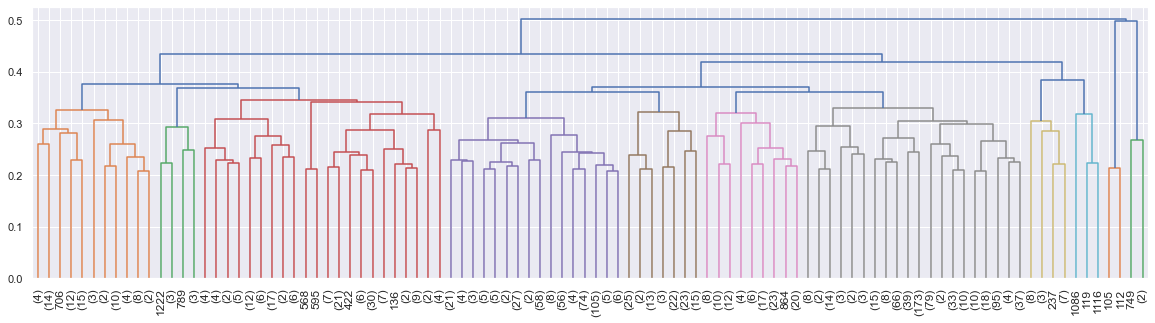

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

plot_dendrogram(
    data=drop_distance,
    model=AgglomerativeClustering(
        distance_threshold=0,
        n_clusters=None,
        affinity="precomputed",
        linkage="average",
    ),
    truncate_mode="lastp",
    p=100,
    distance_sort=True,
    leaf_font_size=12,
    ax=ax,
)

# new dendrogram shows fewer small clsuters and more large clusters
# based on linkage threhsold, maybe there is better similarity

In [59]:
model = AgglomerativeClustering(
    affinity="precomputed",
    linkage="average",
)

HBox(
    [
        visualise_k_elbow(drop_distance, model, silhouette_score),
        visualise_k_elbow(drop_distance, model, calinski_harabasz_score),
    ]
)


    'data': [{'type': 'scatter',
              'uid': '4c3a3ffc-f25c-41d5-a88b-7…

#### Interpreting clusters


##### n=4


In [60]:
agglo_params = {"n_clusters": 4, "affinity": "precomputed", "linkage": "average"}

drop_agglo4 = AgglomerativeClustering(**agglo_params).fit(drop_distance)
cluster_summary(
    df_ordencoded,
    drop_agglo4.labels_,
    ordinal_cols=[
        col for col in ordinal_cols if col not in ("Work Life Balance (1-4)")
    ],
).sort_values("Cluster size", ascending=False)


,Cluster size,Education Level (1-5),Job Satisfaction (1-4),BusinessTravel,"(Age, mean)","(Age, median)","(Distance From Home (KM), mean)","(Distance From Home (KM), median)","(Salary ($), mean)","(Salary ($), median)","(Length of Service (Years), mean)","(Length of Service (Years), median)","(Gender, mode)","(Job Function, mode)","(MaritalStatus, mode)","(Resign Status, mode)"
Cluster labels,,,,,,,,,,,,,,,,
0,1232,3.0,3.0,1.0,37.559253,36.0,8.913149,7.0,6819.866883,5204.0,7.384740,6.0,Male,R&D,Married,No
1,233,3.0,3.0,1.0,33.171674,31.0,10.630901,9.0,4638.347639,3161.0,4.682403,3.0,Male,R&D,Single,Yes
3,3,4.0,4.0,1.0,54.333333,53.0,9.000000,2.0,13442.000000,10312.0,35.000000,33.0,Female,R&D,Married,Yes
2,2,3.5,4.0,0.0,56.500000,56.5,14.000000,14.0,18086.000000,18086.0,4.000000,4.0,Female,HR,"[Married, Single]",No


The two largest clusters of employees who have not resigned and the smaller one who have resigned have also been identified and they also depict the pattern of young and single employees who are paid low salaries and have not been working with the company for long choosing to resign.

Without work life balance, it seems that cluster 3, a cluster of 3 employees who are typically female, married, earn large salaries and have been with the company for a long while decided to resign


##### n=8


In [61]:
agglo_params = {"n_clusters": 8, "affinity": "precomputed", "linkage": "average"}

drop_agglo8 = AgglomerativeClustering(**agglo_params).fit(drop_distance)
cluster_summary(
    df_ordencoded,
    drop_agglo8.labels_,
    ordinal_cols=[
        col for col in ordinal_cols if col not in ("Work Life Balance (1-4)")
    ],
).sort_values("Cluster size", ascending=False)


,Cluster size,Education Level (1-5),Job Satisfaction (1-4),BusinessTravel,"(Age, mean)","(Age, median)","(Distance From Home (KM), mean)","(Distance From Home (KM), median)","(Salary ($), mean)","(Salary ($), median)","(Length of Service (Years), mean)","(Length of Service (Years), median)","(Gender, mode)","(Job Function, mode)","(MaritalStatus, mode)","(Resign Status, mode)"
Cluster labels,,,,,,,,,,,,,,,,
1,722,3.0,3.0,1.0,36.904432,36.0,8.952909,7.0,6433.134349,4973.0,6.839335,5.0,Male,R&D,Married,No
3,488,3.0,3.0,1.0,38.178279,37.0,8.717213,7.0,7085.178279,5300.0,7.600410,6.0,Female,R&D,Married,No
0,158,3.0,3.0,1.0,33.974684,32.0,10.753165,9.0,4769.537975,3424.5,4.620253,3.0,Male,R&D,Single,Yes
2,75,3.0,2.0,1.0,31.480000,31.0,10.373333,9.0,4361.973333,2785.0,4.813333,3.0,Female,R&D,Single,Yes
6,19,4.0,2.0,0.0,44.684211,41.0,9.947368,10.0,13096.315789,13872.0,18.842105,19.0,Male,Sales,Single,No
4,3,5.0,4.0,2.0,49.333333,50.0,24.666667,26.0,16985.333333,16959.0,31.000000,32.0,Male,Sales,Married,No
7,3,4.0,4.0,1.0,54.333333,53.0,9.000000,2.0,13442.000000,10312.0,35.000000,33.0,Female,R&D,Married,Yes
5,2,3.5,4.0,0.0,56.500000,56.5,14.000000,14.0,18086.000000,18086.0,4.000000,4.0,Female,HR,"[Married, Single]",No


The distinction between the two largest clusters based on gender has also been captured, but their sample sizes have changed slightly, with there being more employees in the clusters that have resigned. However, there aren’t any new distinctions that were made in the data


## DBSCAN


In [62]:
from sklearn.cluster import DBSCAN


### Model Description


DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise, and is a type of density-based clustering algorithm. \
Density-based clustering algorithms are based on the idea that data clusters will look like regions of closely-grouped points separated by regions of sparsely-populated points.

The steps for the DBSCAN algorithm are:

1. The number of points that are encountered within a specified radius of $\epsilon$ are counted for every data point
2. Points with more points within the radius $\epsilon$ around them than minimum specified number of points are considered core points and are grouped together with the points in within the radius $\epsilon$, forming a core cluster
3. Then, for every point that has been grouped into a core cluster in step 2, those points outside the core cluster but are within the radius $\epsilon$ are also added to the same cluster, growing the core cluster. Core clusters who encounter each other during this process are merged into the same cluster
4. After step 3, there may be leftover points which did not meet the criteria of being in a core cluster and were not encountered by the growing clusters in step 3. These points are clasified as noise and left out of the clusters

The process will result in dense regions of points growing and expanding their influence to group together other points that are nearby and stopping once a separation of points is encoutered. \
From the process, the two clear parameters for the odel are the radius $\epsilon$ and the minmum number of points required for a core cluster to be formed. \
If $\epsilon$ is set to be too large, clusters with a very large number of points will be formed in the data set.
If the minimum number of points specified is to be too small, then every point will be considered a core point and a large number of clusters will be formed.\
IF $\epsilon$ is specified to be too small and minimum points are specifie to be too large, then no reion will be considered dense enough and every data point will be considered as noise. \

It is thus essential for an optimal $\epsilon$ and minimum number of points to be specified to cluster using the DBSCAN algorithm.


### Model Evaluation


#### Estimating $\epsilon$ and $minpts$


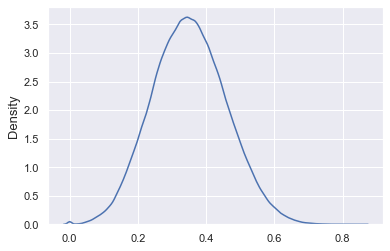

In [63]:
gower_df = df.copy()
gower_df["BusinessTravel"] = gower_df["BusinessTravel"].astype("object")
gower_distance = gower.gower_matrix(gower_df)

sns.kdeplot(x=gower_distance.flatten())
plt.show()

## distribution of distance scalculated from the Gower formula
## provides a reasonable starting point to estimate the value of epsilon, where it can't be
#  larger than the mean distances between the points and can't be smaller than the minimum distance between points


In [64]:
dbs_results = dbscan_summary(
    eps_range=np.linspace(0.05, 0.3, 100),
    min_range=range(5, 25, 1),
    data=gower_distance,
)


In [80]:
dbs_results[
    (dbs_results["noise"] < len(df) / 3)
    & (dbs_results["n"] > 2)
    & (dbs_results["largest"] < len(df) / 2)
]

## filter parameters that result in too many data points considered as noise,
# too little clusters being formed
# and too many points being grouped into the same cluster


,min,eps,n,noise,largest
320,5,0.090404,30,479,334.0
340,5,0.092929,28,457,561.0


In [83]:
dbs2_results = dbscan_summary(
    eps_range=np.linspace(0.090404, 0.092929, 25),
    min_range=range(2, 10, 1),
    data=gower_distance,
)


In [88]:
dbs2_results[
    (dbs2_results["noise"] < len(df) / 3)
    & (dbs2_results["n"] > 2)
    & (dbs2_results["largest"] < len(df) / 2)
]


,min,eps,n,noise,largest
0,2,0.090404,77,296,336
1,3,0.090404,51,348,336
2,4,0.090404,39,414,336
3,5,0.090404,30,479,334
8,2,0.090509,76,296,336
...,...,...,...,...,...
187,5,0.092824,28,457,561
192,2,0.092929,69,274,587
193,3,0.092929,45,322,587
194,4,0.092929,39,368,582


In [92]:
dbs2_results[
    (dbs2_results["noise"] < len(df) / 3)
    & (dbs2_results["n"] > 2)
    & (dbs2_results["largest"] < len(df) / 2)
].sort_values("n").iloc[0]

## pick cluster which minimises number of clusters
# since too many clusters will make it hard to draw conclusions


min          5.000000
eps          0.091877
n           27.000000
noise      469.000000
largest    558.000000
Name: 115, dtype: float64

#### Interpreting Clusters


In [91]:
dbs = DBSCAN(eps=0.091877, min_samples=5, metric="precomputed").fit(gower_distance)

cluster_summary(
    df_ordencoded,
    labels=dbs.labels_,
).sort_values("Cluster size", ascending=False)


,Cluster size,Education Level (1-5),Work Life Balance (1-4),Job Satisfaction (1-4),BusinessTravel,"(Age, mean)","(Age, median)","(Distance From Home (KM), mean)","(Distance From Home (KM), median)","(Salary ($), mean)","(Salary ($), median)","(Length of Service (Years), mean)","(Length of Service (Years), median)","(Gender, mode)","(Job Function, mode)","(MaritalStatus, mode)","(Resign Status, mode)"
Cluster labels,,,,,,,,,,,,,,,,,
2,558,3.0,3.0,3.0,1.0,37.188172,36.0,8.496416,6.0,6258.492832,4444.0,6.541219,5.0,Male,R&D,Married,No
-1,469,3.0,3.0,3.0,1.0,38.473348,38.0,11.597015,9.0,7902.439232,5813.0,8.479744,6.0,Male,R&D,Married,No
4,63,3.0,3.0,3.0,1.0,36.206349,35.0,7.968254,7.0,7019.952381,6578.0,6.714286,5.0,Male,Sales,Married,No
5,49,3.0,3.0,3.0,1.0,37.265306,35.0,9.061224,8.0,6605.714286,5468.0,7.551020,6.0,Female,Sales,Married,No
8,37,3.0,3.0,3.0,1.0,33.783784,34.0,8.216216,6.0,5537.621622,5253.0,6.324324,5.0,Male,Sales,Single,No
14,33,3.0,3.0,3.0,1.0,35.303030,33.0,9.909091,8.0,7259.636364,7264.0,6.545455,7.0,Male,Sales,Divorced,No
7,30,3.0,3.0,3.0,2.0,35.733333,35.5,9.066667,6.5,4312.066667,3839.5,6.033333,5.0,Male,R&D,Married,No
0,28,3.0,2.5,3.0,1.0,30.892857,29.0,8.071429,5.5,2685.464286,2475.5,2.964286,1.5,Male,R&D,Single,Yes
12,23,3.0,3.0,3.0,1.0,36.695652,36.0,5.869565,4.0,5630.304348,4850.0,5.478261,5.0,Female,Sales,Single,No


There are too many clusters to form any general conclusinons about all the employees, thus the clustering is not very insightful. \
Furthermore, the second largest cluster are employees considered as noise \
still, there are some notable points like clusters drawing distinctions between age, salary and length of service. \
The clusters which typically resign also follow the pattern of young and low paid employees from previous clusterings. \
Notably though, cluster 0 with 28 individuals breaks this pattern with the lowest paid and lowest length of service employees but not typically resigning.

Outside of these, the clusters aren't too meaningful due to being too numerous to draw clear conclusions


### Model Improvement


Since the model did not succeed in clustering the data, we will have to try out a different set of features to see if it will better istinguish between the employees. The usual offenders of BusinessTravel and WLB are dropped, an Education Level is removed as well since it showe very little distinctions in the clusters formed by DBSCAN

#### Estimating parameters


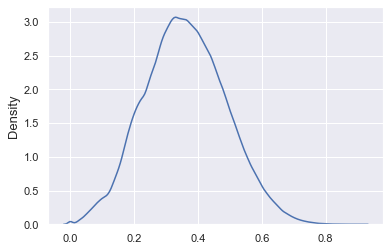

In [69]:
drop_WLBBusiEdu = df.copy()
drop_WLBBusiEdu.drop(
    ["Work Life Balance (1-4)", "BusinessTravel", "Education Level (1-5)"],
    axis=1,
    inplace=True,
)
drop_WLBBusiEdu_gower = gower.gower_matrix(drop_WLBBusiEdu)

sns.kdeplot(x=drop_WLBBusiEdu_gower.flatten())
plt.show()


In [70]:
dbs_WLBBusiEdu_results = dbscan_summary(
    eps_range=np.linspace(0.05, 0.3, 100),
    min_range=range(5, 25, 1),
    data=drop_WLBBusiEdu_gower,
)


In [71]:
## filter parameters that result in too many data
# points considered as noise,
# too little clusters being formed
# and too many points being grouped into the same cluster

dbs_WLBBusiEdu_results[
    (dbs_WLBBusiEdu_results["noise"] < len(df) / 3)
    & (dbs_WLBBusiEdu_results["n"] > 2)
    & (dbs_WLBBusiEdu_results["largest"] < len(df) / 2)
]

# suitable params are still too many, thus limit the number
#  of clusters formed


,min,eps,n,noise,largest
80,5,0.060101,23,455,212
100,5,0.062626,25,411,214
101,6,0.062626,21,468,212
120,5,0.065152,27,379,214
121,6,0.065152,22,437,212
...,...,...,...,...,...
535,20,0.115657,9,300,486
536,21,0.115657,9,303,486
537,22,0.115657,8,331,486
538,23,0.115657,8,335,486


In [79]:
## number of clusters limited to 13 since too
#  many clusters will not simplify the job of
## grouping employees together

dbs_WLBBusiEdu_results[
    (dbs_WLBBusiEdu_results["noise"] < len(df) / 3)
    & (dbs_WLBBusiEdu_results["n"] > 2)
    & (dbs_WLBBusiEdu_results["n"] <= 13)
    & (dbs_WLBBusiEdu_results["largest"] < len(df) / 2)
]


,min,eps,n,noise,largest
248,13,0.080303,13,489,225
269,14,0.082828,13,483,224
289,14,0.085354,13,470,226
290,15,0.085354,13,475,226
309,14,0.087879,13,451,228
...,...,...,...,...,...
535,20,0.115657,9,300,486
536,21,0.115657,9,303,486
537,22,0.115657,8,331,486
538,23,0.115657,8,335,486


In [73]:
dbs_WLBBusiEdu2_results = dbscan_summary(
    eps_range=np.linspace(0.082828 + 0.02, 0.082828 - 0.02, 20),
    min_range=range(8, 20, 1),
    data=drop_WLBBusiEdu_gower,
)


In [74]:
dbs_WLBBusiEdu2_results[
    (dbs_WLBBusiEdu2_results["noise"] < len(df) / 3)
    & (dbs_WLBBusiEdu2_results["n"] > 2)
    & (dbs_WLBBusiEdu2_results["n"] <= 15)
    & (dbs_WLBBusiEdu2_results["largest"] < len(df) / 2)
]

# range of params narrowed down to a few suitable clusterings,


,min,eps,n,noise,largest
9,17,0.102828,14,339,232
10,18,0.102828,14,345,232
11,19,0.102828,13,373,231
20,16,0.100723,14,347,231
21,17,0.100723,13,371,231
22,18,0.100723,13,380,231
23,19,0.100723,13,391,231
31,15,0.098617,14,350,231
32,16,0.098617,13,378,231
33,17,0.098617,13,395,230


In [75]:
## pick cluster which minimises noise

dbs_WLBBusiEdu2_results[
    (dbs_WLBBusiEdu2_results["noise"] < len(df) / 3)
    & (dbs_WLBBusiEdu2_results["n"] > 2)
    & (dbs_WLBBusiEdu2_results["n"] <= 15)
    & (dbs_WLBBusiEdu2_results["largest"] < len(df) / 2)
].sort_values("noise").iloc[0]


min         17.000000
eps          0.102828
n           14.000000
noise      339.000000
largest    232.000000
Name: 9, dtype: float64

#### Interpreting Clusters


In [76]:
dbs = DBSCAN(eps=0.102828, min_samples=17, metric="precomputed").fit(
    drop_WLBBusiEdu_gower
)

cluster_summary(
    df=drop_WLBBusiEdu,
    labels=dbs.labels_,
    ordinal_cols=[
        col
        for col in ordinal_cols
        if col
        not in ("BusinessTravel", "Work Life Balance (1-4)", "Education Level (1-5)")
    ],
)


,Cluster size,Job Satisfaction (1-4),"(Age, mean)","(Age, median)","(Distance From Home (KM), mean)","(Distance From Home (KM), median)","(Salary ($), mean)","(Salary ($), median)","(Length of Service (Years), mean)","(Length of Service (Years), median)","(Gender, mode)","(Job Function, mode)","(MaritalStatus, mode)","(Resign Status, mode)"
Cluster labels,,,,,,,,,,,,,,
-1,339,2.0,38.230088,37.0,11.112094,9.0,7749.887906,5326.0,8.584071,5.0,Male,Sales,Married,Yes
0,232,3.0,37.577586,36.0,9.301724,7.0,6446.422414,4412.0,6.961207,5.0,Male,R&D,Married,No
1,38,3.0,30.210526,29.0,8.157895,5.5,2789.552632,2475.5,3.105263,2.0,Male,R&D,Single,Yes
2,144,3.0,38.527778,37.0,8.652778,7.0,6660.750000,4788.5,7.000000,5.5,Female,R&D,Married,No
3,126,3.0,35.952381,35.0,8.095238,6.0,5643.436508,4213.5,5.738095,5.0,Male,R&D,Single,No
4,122,3.0,37.040984,36.0,8.975410,7.0,6520.221311,4908.5,6.663934,6.0,Male,R&D,Divorced,No
5,100,3.0,35.750000,34.5,7.750000,5.5,5828.220000,4496.5,6.910000,6.0,Female,R&D,Single,No
6,65,3.0,37.215385,36.0,8.461538,6.0,5188.892308,4505.0,6.030769,5.0,Female,R&D,Divorced,No
7,88,3.0,35.965909,35.0,8.397727,6.0,6565.056818,6220.5,6.295455,5.0,Male,Sales,Married,No


The points considered as noise make up the largest cluster but are also mostly made up of employees who have resigned \
Among the actual clusters formed, only one consists mostly of employees having resigned which is cluster 1. \
These employees once again are typically youger, paid less, have been with the company for a short while and are mostly single males in R&D.

Some notable cluster is cluster 12, with 18 employees who are typically Females who work in Sales and they have a median job satisfaction of only 2 compared to the median of 3 and 4 for the other clusters, employees in that cluster typically don't resign \
and cluster 10 where employees have the highest salaries and a median Job Satisfaction of 4, which is the highest possible value and is comprised mostly of males who are divorced and work in Sales and they mostly have not resigned

Generally, the clusters from the DBSCAN algorithm aren't extremely insightful and don't draw a lot of clear distinctions between employees


# Insights


Out of the 4 models attempted, Hierarchical Agglomerative Clustering prove to be most promising in its cluster summaries and segmentation of employees.\
Hence, it will be used to try to gather the most insights for helping management satisfy and retain employees

## Functions and Libraries


In [200]:
## percentage plots
def plot_proportions(data, x, hue_cols):
    fig, axs = create_subplots_axs(n_plots=len(hue_cols), n_cols=3, plot_w=7)

    for i, col in enumerate(hue_cols):
        snax = sns.histplot(
            discrete=True,
            data=data,
            x=x,
            hue=col,
            multiple="fill",
            stat="proportion",
            shrink=0.8,
            ax=axs[i],
        )

        sns.move_legend(axs[i], "center", bbox_to_anchor=(0, -0.3))

        ## add annotations
        for container in snax.containers:
            snax.bar_label(container, label_type="center", fmt="%.2f")

    return axs


## Plots


In [220]:
# get info from drpped wlb hac using gower distance

labels_agglo = drop_agglo8.labels_

data = df_ordencoded.copy()
data.drop("Work Life Balance (1-4)", axis=1, inplace=True)

data.columns.values


array(['Age', 'Gender', 'BusinessTravel', 'Job Function',
       'Distance From Home (KM)', 'Education Level (1-5)',
       'Job Satisfaction (1-4)', 'MaritalStatus', 'Salary ($)',
       'Length of Service (Years)', 'Resign Status'], dtype=object)

In [222]:
data["clusters"] = labels_agglo

sizes = data.groupby("clusters").size().to_frame("sizes").T

sizes
## employees have been grouped into 7 groups,
# 4 of them represent a majorit yalready


clusters,0,1,2,3,4,5,6,7
sizes,158,722,75,488,3,2,19,3


The proportion of employees in each cluster is slightly unbalanced, with clusters 3 and 1 having the most employees, 0 and 3 having the next most and the rest all having very few employees, suggesting that the last few clusters might be outliers in the dataset


clusters,0,1,2,3,4,5,6,7
sizes,158,722,75,488,3,2,19,3


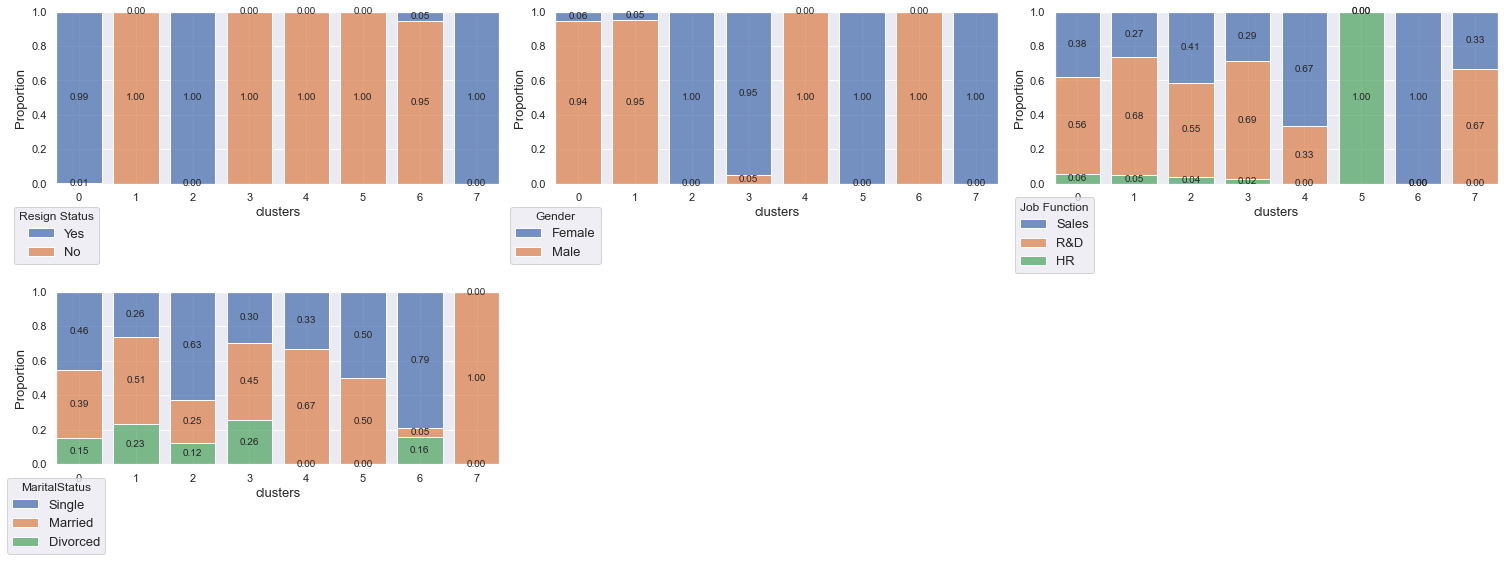

In [253]:
display(sizes)

plot_proportions(
    data=data, x="clusters", hue_cols=["Resign Status", "Gender", "Job Function", "MaritalStatus"]
)

plt.tight_layout()
plt.show()
## employees have been seprated quite cleanly

The segregation of each cluster appears to have been done astonishingly cleanly for gender and resign status

- cluster 0 are males who have resigend
- cluster 1 are males who have not resigned
- cluster 2 are females who have resigned
- cluster 3 are females who have not resigned
- the other clusters are so few in numbers they might be outliers, hence no conclusions will be drawn using them

The job functions of these employees seem to quite proprtionate for all the clusters \
but males those who have resigned (1 and 3) belong more to R&D than other dept.

Cluster 2 employees are proprtionately more single than the clusters, corresponding to female employees who have resigened \
However, this has little to do with their professional lives, so no conclusions will be made

clusters,0,1,2,3,4,5,6,7
sizes,158,722,75,488,3,2,19,3


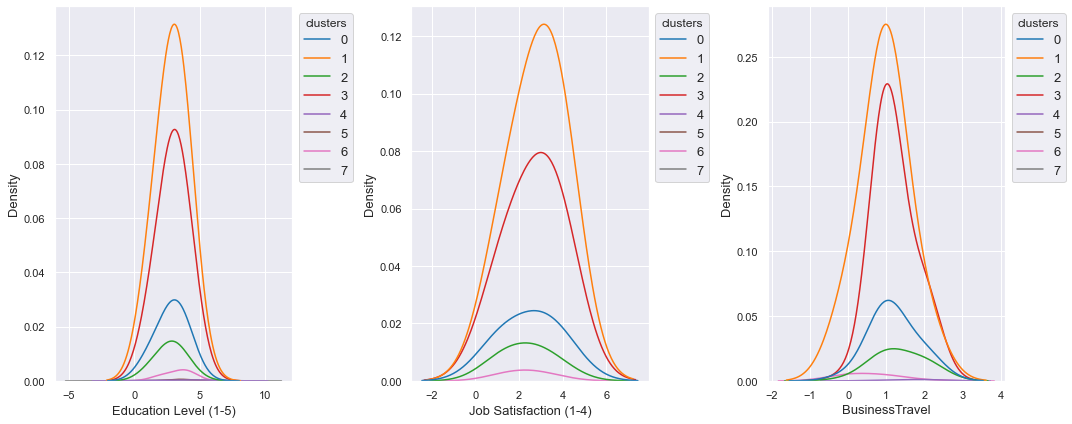

In [251]:
display(sizes)

fig, axs = plt.subplots(1, 3, figsize=(15, 6))

for i, col in enumerate(["Education Level (1-5)", "Job Satisfaction (1-4)", "BusinessTravel"]):
    g = sns.kdeplot(
        data=data,
        x=col,
        hue="clusters",
        palette="tab10",
        bw_method=1,
        warn_singular=False,
        ax=axs[i],
    )
    sns.move_legend(g, loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Clusters 1 and 3 seem to be slightly more positively skewed for both Job Satis. and Education level than the other clusters. \
corresponding to the employees who haven't resigned from the company 

However, the difference is negligible on the scale of 1-4 or 1-5 that no real conclusions can be safely drawn from this

There is a slight positive skew for cluster 2 for BusinessTravle but once again no clear distinction for should be drawn from the miniscule difference with a range of 1-2

clusters,0,1,2,3,4,5,6,7
sizes,158,722,75,488,3,2,19,3


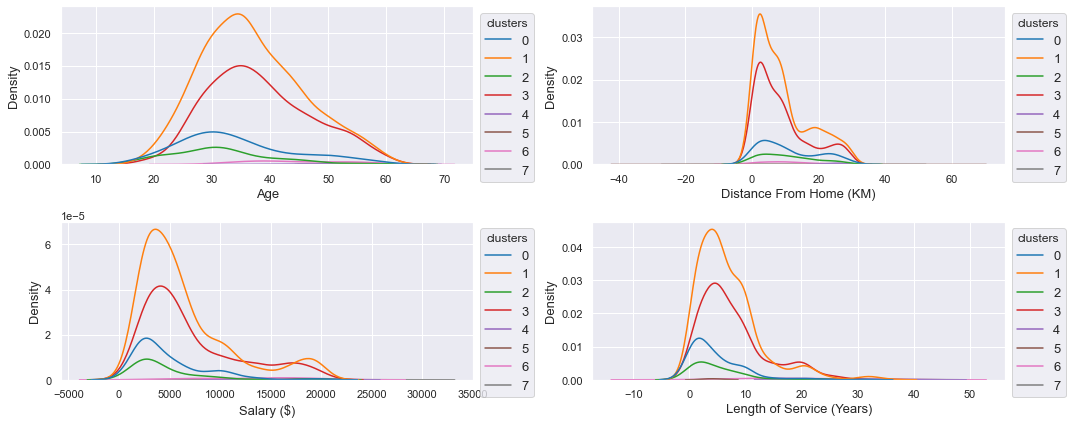

In [250]:
display(sizes)

fig, axs = plt.subplots(2, 2, figsize=(15, 6))
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    g = sns.kdeplot(
        data=data,
        x=col,
        hue="clusters",
        palette="tab10",
        ax=axs[i],
    )
    sns.move_legend(g, loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

For age, the curves for clusters 1 and 3 skew more positively than the other clusters, corresponding to employees who have not resigned being older on average than those who have \
For distanec from home, the peaks in the curves sadly show no clear distinction between the clusters, all lining up at the same locations
For Salary and Length of service, the curves for cluster 1 and 3 are more positively skewed than the other clusters and with a significant bimodal pattern with a hump at the
positive tails.

This corresponsd to employees who have not resigned being older, having been with the company for longer and having higher salaries than those who have resigne

### In conclusion,

Employees who are more likely to resign are typically younger and fresh employees in the company. These employees are also typically paid lesser than the others. \
These facts suggest a pattern where younger employees enter the company and after working for a short while realise that they receive lower salaries than their coworkers. \
This possibly leads to them feeling frustrated and unappreciated in the work place, causing them to resign and leave the company after a short while. 

Thus, management should look into better orienting new employees in the company, perhaps compensating them more or offering further benefits to keep them invested in the company


On the other hand, the correlations might not necessarily be causally related and the simple fact that younger employees are less likely to know their place in the world \
and thus are more likely to resign early to find their passions, making it so that they dont have the chance to get promotions and raise their salaries